## <font color = "purple"> Problem Statement:

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate.Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.



## <font color = "purple">Business objective:

1. The dataset contains customer-level information for a span of four consecutive months - June, July, August and September.The business objective is to predict the churn in the last  month using the data (features) from the first three months.


2. To identify the important predictor attributes which help the business understand indicators of churn.

3. To recommend strategies to manage customer churn based on the observations.

**Retaining high profitable customers is the main business goal here.**

## <font color = "purple"> Steps:

1. Read,understand and visualise the data
2. Prepare the data for modelling
3. Model Building
4. Model evaluation

In [1]:
# Import the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.metrics import precision_recall_curve,roc_auc_score,roc_curve
from sklearn.preprocessing import LabelEncoder

#Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold,RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,cross_val_predict


# Other Classifier libraries
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.svm import SVC
import xgboost as xgb
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

In [3]:
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)

### <font color = "red"> Reading and understanding the data 

In [4]:
telecom=pd.read_csv("/Users/husna/Downloads/telecom_churn_data.csv")

In [5]:
telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [6]:
telecom.shape

(99999, 226)

In [7]:
telecom['mobile_number'].value_counts().sum()

99999

Observation: Since the number of rows and the distinct mobile numbers are same, ther is no duplicate present in the data

In [8]:
# to list the columns 
telecom.columns.tolist()

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 's

In [9]:
# to understand the data
telecom.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [10]:
telecom.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

### <font color = "red"> Data preparation

**In churn prediction, we assume that there are three phases of customer lifecycle :**

- The ‘good’ phase [Month 6 & 7]
- The ‘action’ phase [Month 8]
- The ‘churn’ phase [Month 9]

In this case, since we are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

#### 1.  Derive new features

In [11]:
# read the data dictionary

dictionary=pd.read_excel("/Users/husna/Downloads/Data+Dictionary-+Telecom+Churn+Case+Study.xlsx")
dictionary

Acronyms                                           Descriptions
0   MOBILE_NUMBER                              Customer phone number
1       CIRCLE_ID  Telecom circle area to which the customer belo...
2             LOC           Local calls - within same telecom circle
3             STD             STD calls - outside the calling circle
4              IC                                     Incoming calls
5              OG                                     Outgoing calls
6             T2T  Operator T to T, i.e. within same operator (mo...
7         T2M                    Operator T to other operator mobile
8         T2O                Operator T to other operator fixed line
9         T2F                         Operator T to fixed lines of T
10        T2C                     Operator T to it’s own call center
11       ARPU                               Average revenue per user
12        MOU                         Minutes of usage - voice calls
13        AON      Age on network - number of days the customer i...
14       ONNET     All kind of calls within the same operator net...
15     OFFNET       All kind of calls outside the operator T network
16           ROAM  Indicates that customer is in roaming zone dur...
17         SPL                                         Special calls
18        ISD                                              ISD calls
19       RECH                                               Recharge
20        NUM                                                 Number
21        AMT                               Amount in local currency
22        MAX                                                Maximum
23       DATA                                        Mobile internet
24         3G                                             3G network
25         AV                                                Average
26        VOL                   Mobile internet usage volume (in MB)
27         2G                                             2G network
28        PCK                 Prepaid service schemes called - PACKS
29      NIGHT         Scheme to use during specific night hours only
30    MONTHLY      Service schemes with validity equivalent to a ...
31      SACHET     Service schemes with validity smaller than a m...
32        *.6                              KPI for the month of June
33        *.7                              KPI for the month of July
34        *.8                            KPI for the month of August
35        *.9                         KPI for the month of September
36        FB_USER  Service scheme to avail services of Facebook a...
37        VBC      Volume based cost - when no specific scheme is...

In [12]:
# Let's extract the columns containing the recharge amount

recharge_amt_columns=telecom.columns[telecom.columns.str.contains("rech")]
recharge_amt_columns.tolist()

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_num_9',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_amt_9',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'max_rech_amt_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9']

Observation: From the above features,we can create new feature that could be an important indicators

In [13]:
# checking the missing value percentage
recharge_null_check=100*(telecom.loc[:,recharge_amt_columns].isnull().sum()/len(telecom))
df=pd.DataFrame(recharge_null_check)
df.rename(columns={0:'Null Percentage'},inplace=True)
df

Null Percentage
total_rech_num_6                 0.000000
total_rech_num_7                 0.000000
total_rech_num_8                 0.000000
total_rech_num_9                 0.000000
total_rech_amt_6                 0.000000
total_rech_amt_7                 0.000000
total_rech_amt_8                 0.000000
total_rech_amt_9                 0.000000
max_rech_amt_6                   0.000000
max_rech_amt_7                   0.000000
max_rech_amt_8                   0.000000
max_rech_amt_9                   0.000000
date_of_last_rech_6              1.607016
date_of_last_rech_7              1.767018
date_of_last_rech_8              3.622036
date_of_last_rech_9              4.760048
date_of_last_rech_data_6        74.846748
date_of_last_rech_data_7        74.428744
date_of_last_rech_data_8        73.660737
date_of_last_rech_data_9        74.077741
total_rech_data_6               74.846748
total_rech_data_7               74.428744
total_rech_data_8               73.660737
total_rech_data_9               74.077741
max_rech_data_6                 74.846748
max_rech_data_7                 74.428744
max_rech_data_8                 73.660737
max_rech_data_9                 74.077741
count_rech_2g_6                 74.846748
count_rech_2g_7                 74.428744
count_rech_2g_8                 73.660737
count_rech_2g_9                 74.077741
count_rech_3g_6                 74.846748
count_rech_3g_7                 74.428744
count_rech_3g_8                 73.660737
count_rech_3g_9                 74.077741
av_rech_amt_data_6              74.846748
av_rech_amt_data_7              74.428744
av_rech_amt_data_8              73.660737
av_rech_amt_data_9              74.077741

Observation: We can see columns with missing values around 74 percent

In [14]:
telecom.loc[:,recharge_amt_columns].describe()

total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_num_9  \
count      99999.000000      99999.000000      99999.000000      99999.000000   
mean           7.558806          7.700367          7.212912          6.893019   
std            7.078405          7.070422          7.203753          7.096261   
min            0.000000          0.000000          0.000000          0.000000   
25%            3.000000          3.000000          3.000000          3.000000   
50%            6.000000          6.000000          5.000000          5.000000   
75%            9.000000         10.000000          9.000000          9.000000   
max          307.000000        138.000000        196.000000        131.000000   

       total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  total_rech_amt_9  \
count      99999.000000      99999.000000      99999.000000      99999.000000   
mean         327.514615        322.962970        324.157122        303.345673   
std          398.019701        408.114237        416.540455        404.588583   
min            0.000000          0.000000          0.000000          0.000000   
25%          109.000000        100.000000         90.000000         52.000000   
50%          230.000000        220.000000        225.000000        200.000000   
75%          437.500000        428.000000        434.500000        415.000000   
max        35190.000000      40335.000000      45320.000000      37235.000000   

       max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  max_rech_amt_9  \
count    99999.000000    99999.000000    99999.000000    99999.000000   
mean       104.637486      104.752398      107.728207      101.943889   
std        120.614894      124.523970      126.902505      125.375109   
min          0.000000        0.000000        0.000000        0.000000   
25%         30.000000       30.000000       30.000000       28.000000   
50%        110.000000      110.000000       98.000000       61.000000   
75%        120.000000      128.000000      144.000000      144.000000   
max       4010.000000     4010.000000     4449.000000     3399.000000   

       total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       25153.000000       25571.000000       26339.000000   
mean            2.463802           2.666419           2.651999   
std             2.789128           3.031593           3.074987   
min             1.000000           1.000000           1.000000   
25%             1.000000           1.000000           1.000000   
50%             1.000000           1.000000           1.000000   
75%             3.000000           3.000000           3.000000   
max            61.000000          54.000000          60.000000   

       total_rech_data_9  max_rech_data_6  max_rech_data_7  max_rech_data_8  \
count       25922.000000     25153.000000     25571.000000     26339.000000   
mean            2.441170       126.393392       126.729459       125.717301   
std             2.516339       108.477235       109.765267       109.437851   
min             1.000000         1.000000         1.000000         1.000000   
25%             1.000000        25.000000        25.000000        25.000000   
50%             2.000000       145.000000       145.000000       145.000000   
75%             3.000000       177.000000       177.000000       179.000000   
max            84.000000      1555.000000      1555.000000      1555.000000   

       max_rech_data_9  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  \
count      25922.00000     25153.000000     25571.000000     26339.000000   
mean         124.94144         1.864668         2.044699         2.016288   
std          111.36376         2.570254         2.768332         2.720132   
min            1.00000         0.000000         0.000000         0.000000   
25%           25.00000         1.000000         1.000000         1.000000   
50%          145.00000         1.000000         1.000000         1.000000   
75%          179.00000         2.000000    

Observation: As the minimum value is 1, we can impute the null values with zero, considering there was no recharge done.

In [15]:
zero_impute=[]
for i in ['max_rech_amt_','total_rech_data_','max_rech_data_','count_rech_2g_','count_rech_3g_','av_rech_amt_data_']:
    for j in [6,7,8,9]:
        zero_impute.append(i+str(j))
zero_impute

['max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'max_rech_amt_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9']

In [16]:
# imputing the Nan with zero

telecom[zero_impute]=telecom[zero_impute].fillna(0)

Observation:
- Creating a feature 'total_rech_amt_data' to capture amount     utilized by customer for data.
  
- Creating a new feature 'overall_rech_amt' in months to capture overall amount used by the customer for all services(both data and calling)

In [17]:
#Creating a new column 'total_rech_amt_data' which shows total data recharge

telecom['total_rech_amt_data_6']=telecom['total_rech_data_6']*telecom['av_rech_amt_data_6']
telecom['total_rech_amt_data_7']=telecom['total_rech_data_7']*telecom['av_rech_amt_data_7']
telecom['total_rech_amt_data_8']=telecom['total_rech_data_8']*telecom['av_rech_amt_data_8']

#Creating a new feature 'overall_rech_amt' 
telecom['overall_rech_amt_6']=telecom['total_rech_amt_data_6']+telecom['total_rech_amt_6']
telecom['overall_rech_amt_7']=telecom['total_rech_amt_data_7']+telecom['total_rech_amt_7']
telecom['overall_rech_amt_8']=telecom['total_rech_amt_data_8']+telecom['total_rech_amt_8']

In [18]:
# removing the features 'av_rech_amt_data_x',total_rech_data_x,total_rech_amt_data_x where x=6,7,8 to prevent redundancy

telecom.drop(['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9',
'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9','total_rech_amt_data_6','total_rech_amt_data_7','total_rech_amt_data_8'],axis = 1,inplace = True)


#### 2.  Filtering high valued customers

- High valued customers are those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [19]:
# Calculate the averge recharge done by customers in the month of July and August
telecom['avg_rech_amt_6n7']=(telecom['overall_rech_amt_6']+telecom['overall_rech_amt_7'])/2

In [20]:
# finding the 70th percentile to filter the high valued customer
HVC_filter=telecom['avg_rech_amt_6n7'].quantile(0.7)
print("\n The 70th quantile value to filter high valued customer is", HVC_filter)


 The 70th quantile value to filter high valued customer is 478.0


In [21]:
# Filtering the date to the top 30% who are considered high valued customers

telecom_hvc=telecom[telecom['avg_rech_amt_6n7']>HVC_filter]

In [22]:
# checking the shape
telecom_hvc.shape

(29953, 222)

#### 3. Tagging the churner

**Deriving Churn feature based on Usage based Churn**

- Derive churn means hear we are using 9 month(The ‘churn’ phase) data , To get the target variable(In this case stydy they did not provide any target variable we have to derive it from churn phase data) For that, we need to find the derive churn variable using total_ic_mou_9,total_og_mou_9,vol_2g_mb_9 and vol_3g_mb_9 attributes.

In [23]:
# making the list of churn features
churn_features=['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']


Observation: Let us introduce a new column "churn": values would be either 1 (churn) or 0 (non-churn)

In [24]:
# creating the new feature 'Churn' which turns to be the target variable
telecom_hvc['Churn']=np.where(telecom_hvc[churn_features].sum(axis=1)==0,1,0)

In [25]:
# checking for class imbalance
telecom_hvc['Churn'].value_counts(normalize=True)*100

0    91.877274
1     8.122726
Name: Churn, dtype: float64

Observation: Class imbalance clearly visble in this data

In [26]:
#renaming the columns whivh are the name of months
telecom_hvc.rename(columns={'aug_vbc_3g':'vbc_3g_8','jul_vbc_3g':'vbc_3g_7','jun_vbc_3g':'vbc_3g_6','sep_vbc_3g':'vbc_3g_9'},inplace=True)

In [27]:
# dropping all the attributes related to month 9

nine_month_col=[]

for i in telecom_hvc:
    if'_9' in i:
        nine_month_col.append(i)

nine_month_col

['last_date_of_month_9',
 'arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'fb_user_9',
 'vbc_3g_9']

In [28]:
# dropping the ninth month colume from the data

telecom_hvc=telecom_hvc.drop(nine_month_col,axis=1)

In [29]:
telecom_hvc.shape

(29953, 170)

In [30]:
# rechecking the column

telecom_hvc.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 170 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

#### 4. Data cleaning | Missing value treatment | Exploratory Data Analysis

Observation:The columns with date are not required for the analysis

In [31]:
# deleting the columns with date

date_columns=[d for d in telecom_hvc.columns.tolist() if 'date'in d ]

telecom_hvc.drop(columns=date_columns,axis=1, inplace=True)

Observation: The columns 'mobile_number' and 'circle_id' can also be dropped as it is not required

In [32]:
#dropping the columns 'mobile_number' and 'circle_id' 

telecom_hvc.drop(['mobile_number','circle_id'],axis=1,inplace=True)

In [33]:
telecom_hvc.shape

(29953, 159)

In [34]:
telecom_hvc.nunique().sort_values()

loc_og_t2o_mou            1
std_og_t2o_mou            1
loc_ic_t2o_mou            1
std_ic_t2o_mou_8          1
std_ic_t2o_mou_7          1
std_ic_t2o_mou_6          1
std_og_t2c_mou_8          1
std_og_t2c_mou_7          1
std_og_t2c_mou_6          1
fb_user_8                 2
fb_user_7                 2
fb_user_6                 2
night_pck_user_8          2
night_pck_user_7          2
night_pck_user_6          2
Churn                     2
monthly_2g_6              5
monthly_2g_7              6
monthly_2g_8              6
monthly_3g_6             12
monthly_3g_8             12
monthly_3g_7             15
count_rech_3g_6          25
sachet_3g_6              25
sachet_3g_7              27
count_rech_3g_7          28
sachet_3g_8              29
count_rech_3g_8          29
sachet_2g_6              31
count_rech_2g_6          31
count_rech_2g_8          34
sachet_2g_8              34
sachet_2g_7              35
count_rech_2g_7          36
max_rech_data_6          48
max_rech_data_7     

Observation: The columns with 1 unique value can also be dropped.

In [35]:
# Segregating the columns with unique value 1.
unique_value_1=[]

for i in telecom_hvc.columns:
    if telecom_hvc[i].nunique()==1:
        unique_value_1.append(i)

unique_value_1

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

In [36]:
# dropping the columns with unique value 1

telecom_hvc.drop(columns=unique_value_1,axis=1,inplace=True)

In [37]:
telecom_hvc.shape

(29953, 150)

Observation: Now we will check for missing values and do the necessary treatment wherever required

In [38]:
#handling missing value
telecom_missing=100*(telecom_hvc.isnull().sum()/len(telecom_hvc))
telecom_missing.sort_values(ascending=False)

night_pck_user_8      46.799987
arpu_3g_8             46.799987
fb_user_8             46.799987
arpu_2g_8             46.799987
arpu_2g_6             44.112443
arpu_3g_6             44.112443
night_pck_user_6      44.112443
fb_user_6             44.112443
arpu_3g_7             43.117551
arpu_2g_7             43.117551
night_pck_user_7      43.117551
fb_user_7             43.117551
std_ic_mou_8           3.912797
loc_og_mou_8           3.912797
std_ic_t2f_mou_8       3.912797
loc_ic_t2m_mou_8       3.912797
std_og_t2t_mou_8       3.912797
std_ic_t2m_mou_8       3.912797
loc_og_t2m_mou_8       3.912797
isd_og_mou_8           3.912797
std_og_t2m_mou_8       3.912797
loc_og_t2c_mou_8       3.912797
std_ic_t2t_mou_8       3.912797
std_og_t2f_mou_8       3.912797
loc_ic_mou_8           3.912797
loc_ic_t2t_mou_8       3.912797
loc_ic_t2f_mou_8       3.912797
spl_ic_mou_8           3.912797
og_others_8            3.912797
loc_og_t2f_mou_8       3.912797
isd_ic_mou_8           3.912797
spl_og_m

In [39]:
#dropping the columns with missing value percentage greater than 40.
columns_to_drop=telecom_missing[telecom_missing>40].index
columns_to_drop.tolist()

['arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8']

In [40]:
# dropping the columns with high missing value

telecom_hvc.drop(columns=columns_to_drop, inplace=True)

In [41]:
#checking for the missing values again 
(100*(telecom_hvc.isnull().sum()/len(telecom_hvc))).sort_values(ascending=False)

loc_og_t2m_mou_8      3.912797
loc_og_mou_8          3.912797
loc_ic_t2m_mou_8      3.912797
loc_og_t2c_mou_8      3.912797
og_others_8           3.912797
loc_ic_t2f_mou_8      3.912797
loc_og_t2f_mou_8      3.912797
std_og_t2t_mou_8      3.912797
loc_ic_mou_8          3.912797
std_og_mou_8          3.912797
std_ic_t2t_mou_8      3.912797
loc_og_t2t_mou_8      3.912797
std_ic_t2m_mou_8      3.912797
spl_og_mou_8          3.912797
roam_og_mou_8         3.912797
std_ic_t2f_mou_8      3.912797
std_og_t2m_mou_8      3.912797
roam_ic_mou_8         3.912797
std_ic_mou_8          3.912797
offnet_mou_8          3.912797
spl_ic_mou_8          3.912797
isd_og_mou_8          3.912797
onnet_mou_8           3.912797
isd_ic_mou_8          3.912797
std_og_t2f_mou_8      3.912797
ic_others_8           3.912797
loc_ic_t2t_mou_8      3.912797
og_others_6           1.809502
spl_og_mou_6          1.809502
std_ic_t2m_mou_6      1.809502
loc_ic_t2m_mou_6      1.809502
loc_ic_t2f_mou_6      1.809502
loc_ic_m

Observation:

- Note that all the columns with *_mou have exactly 3.91% rows with missing values for month 6, 1.8% missing for 8th month and 1.78% for 7th month.
- This is an indicator of a meaningful missing values.
- Further note that *_mou columns indicate minutes of usage, which are applicable only to customers using calling plans. It is probable that, these customers not using calling plans, hence can be imputed with zero.


In [42]:
# segregating the columns with missing value greater than zero

telecom_missing_1=100*(telecom_hvc.isnull().sum()/len(telecom_hvc))
columns_to_impute=telecom_missing_1[telecom_missing_1>0].index
columns_to_impute.tolist()

['onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou

In [43]:
# imputing the null with zero

telecom_hvc[columns_to_impute]=telecom_hvc[columns_to_impute].fillna(0)

In [44]:
# checking for null values again

telecom_hvc.isnull().sum()

arpu_6                0
arpu_7                0
arpu_8                0
onnet_mou_6           0
onnet_mou_7           0
onnet_mou_8           0
offnet_mou_6          0
offnet_mou_7          0
offnet_mou_8          0
roam_ic_mou_6         0
roam_ic_mou_7         0
roam_ic_mou_8         0
roam_og_mou_6         0
roam_og_mou_7         0
roam_og_mou_8         0
loc_og_t2t_mou_6      0
loc_og_t2t_mou_7      0
loc_og_t2t_mou_8      0
loc_og_t2m_mou_6      0
loc_og_t2m_mou_7      0
loc_og_t2m_mou_8      0
loc_og_t2f_mou_6      0
loc_og_t2f_mou_7      0
loc_og_t2f_mou_8      0
loc_og_t2c_mou_6      0
loc_og_t2c_mou_7      0
loc_og_t2c_mou_8      0
loc_og_mou_6          0
loc_og_mou_7          0
loc_og_mou_8          0
std_og_t2t_mou_6      0
std_og_t2t_mou_7      0
std_og_t2t_mou_8      0
std_og_t2m_mou_6      0
std_og_t2m_mou_7      0
std_og_t2m_mou_8      0
std_og_t2f_mou_6      0
std_og_t2f_mou_7      0
std_og_t2f_mou_8      0
std_og_mou_6          0
std_og_mou_7          0
std_og_mou_8    

Observation: There is no more missing value

**Exploratory Data Analysis**

Observation: The variable 'aon' (Age on network - number of days the customer is using the operator T network) can be converted as 'tenure_in_months' and store in seperate DataFrame for checking.

In [45]:
#univariate analysis
# creating a new variable 'tenure_in_months'

telecom_hvc_tenure_in_months =(telecom_hvc['aon']/30).round(0)

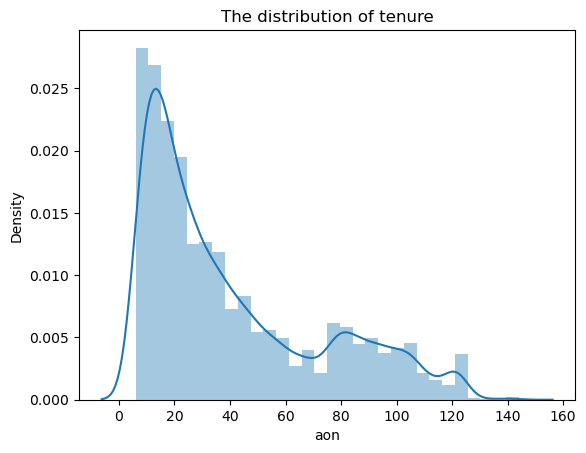

In [46]:
# visualising of the density of tenure_in_months

sns.distplot(telecom_hvc_tenure_in_months, bins=30)
plt.title("The distribution of tenure")
plt.show()

Observation: Maximum density lies in bucket of 5-20 months

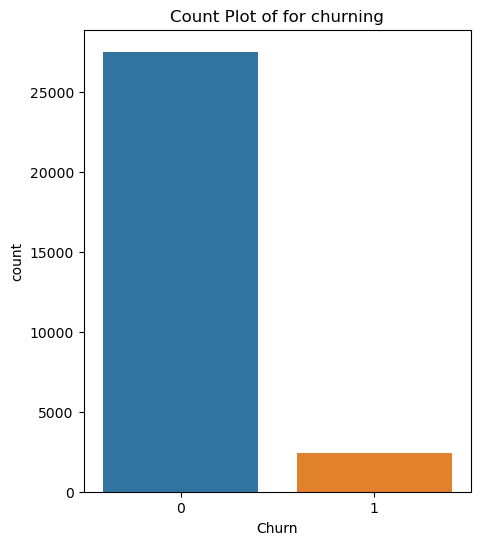

In [47]:
# visualising churn data 
plt.figure(figsize=(5,6))
sns.countplot(x='Churn',data= telecom_hvc)
plt.title('Count Plot of for churning')
plt.show()

Observation: From this we can understand that only few number of customers had churned compared to non- churned and hence we need to take care of this class while modelling.

In [48]:
# create a boxplot for 6th,7th and 8th month

def chart_boxplot(attribute):
    plt.figure(figsize=(20,16))
    df=telecom_hvc
    plt.subplot(2,3,1)
    sns.boxplot(data=telecom_hvc, y= attribute+'_6', x="Churn",hue='Churn', showfliers=False, palette="dark")
    plt.subplot(2,3,2)
    sns.boxplot(data=telecom_hvc, y= attribute+'_7', x="Churn",hue='Churn', showfliers=False, palette="dark")
    plt.subplot(2,3,3)
    sns.boxplot(data=telecom_hvc, y= attribute+'_8', x="Churn",hue='Churn', showfliers=False, palette="dark")
    plt.show()

In [49]:
#Recharge amount related variable

rech_amt_columns=telecom_hvc.columns[telecom_hvc.columns.str.contains('rech_amt')]

In [50]:
rech_amt_columns.tolist()

['total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'overall_rech_amt_6',
 'overall_rech_amt_7',
 'overall_rech_amt_8',
 'avg_rech_amt_6n7']

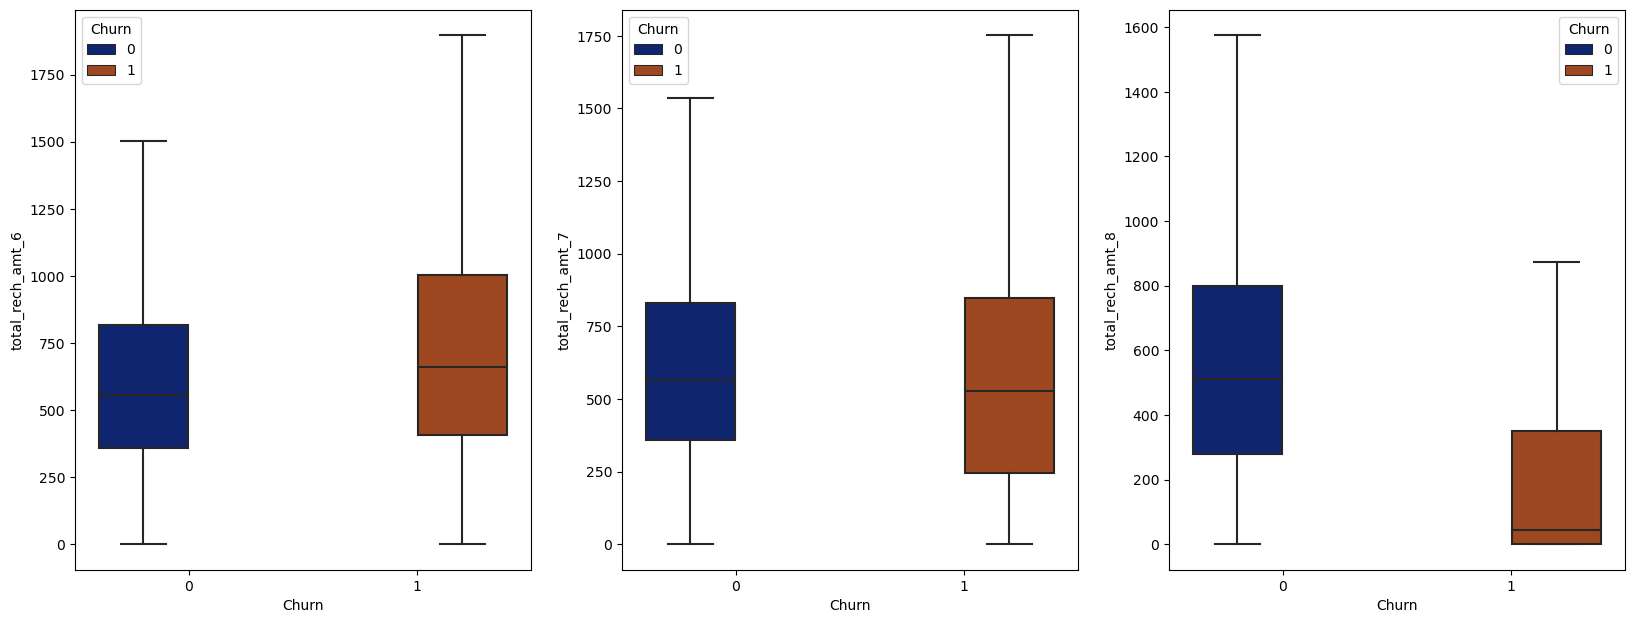

In [51]:
#visualising the variation in 3 months for total recharge amount

chart_boxplot('total_rech_amt')

Observation: We can see a drop in the total recharge amount by the  churned customers in the 8th Month (Action Phase).

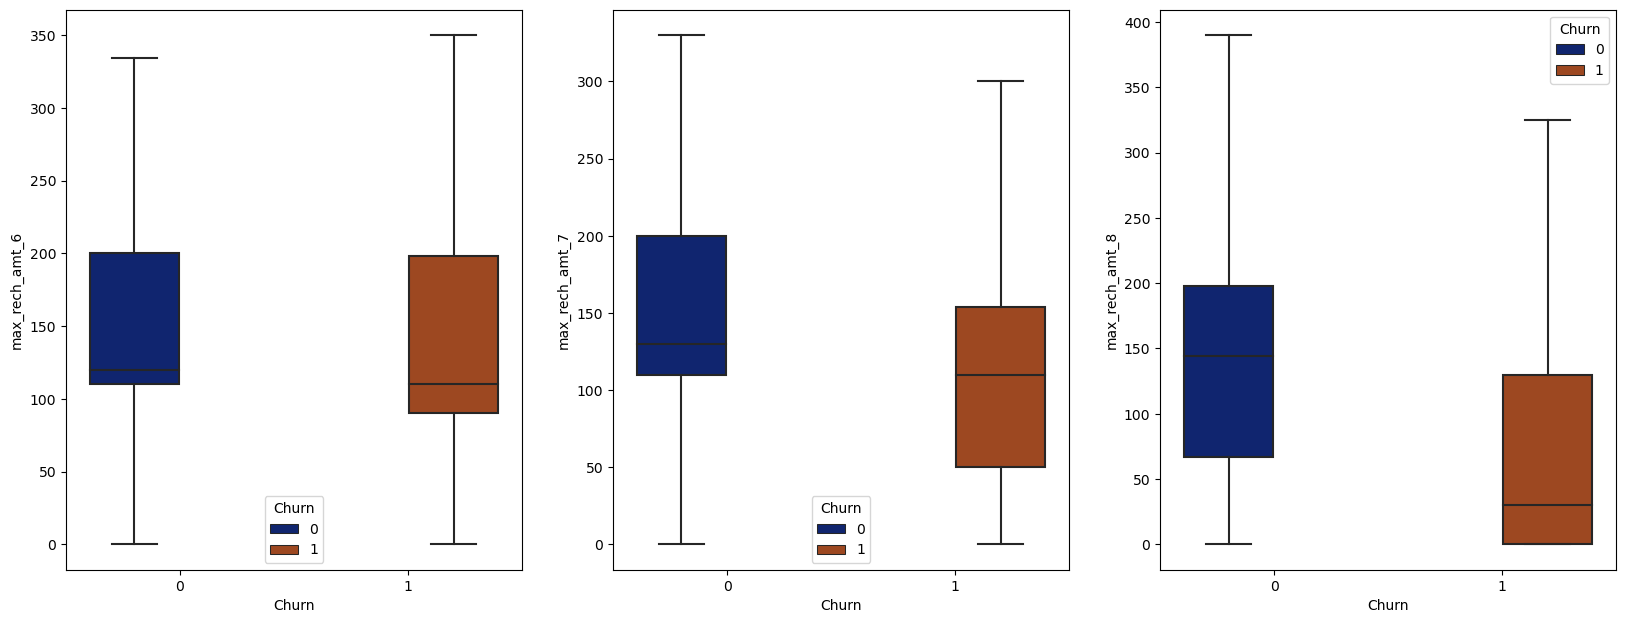

In [52]:
#visualising the variation in 3 months for maximum recharge amount

chart_boxplot('max_rech_amt')

Observation: We can also see a drop of the maximum recharge amount by the  churned customers in the 8th Month (Action Phase) again.

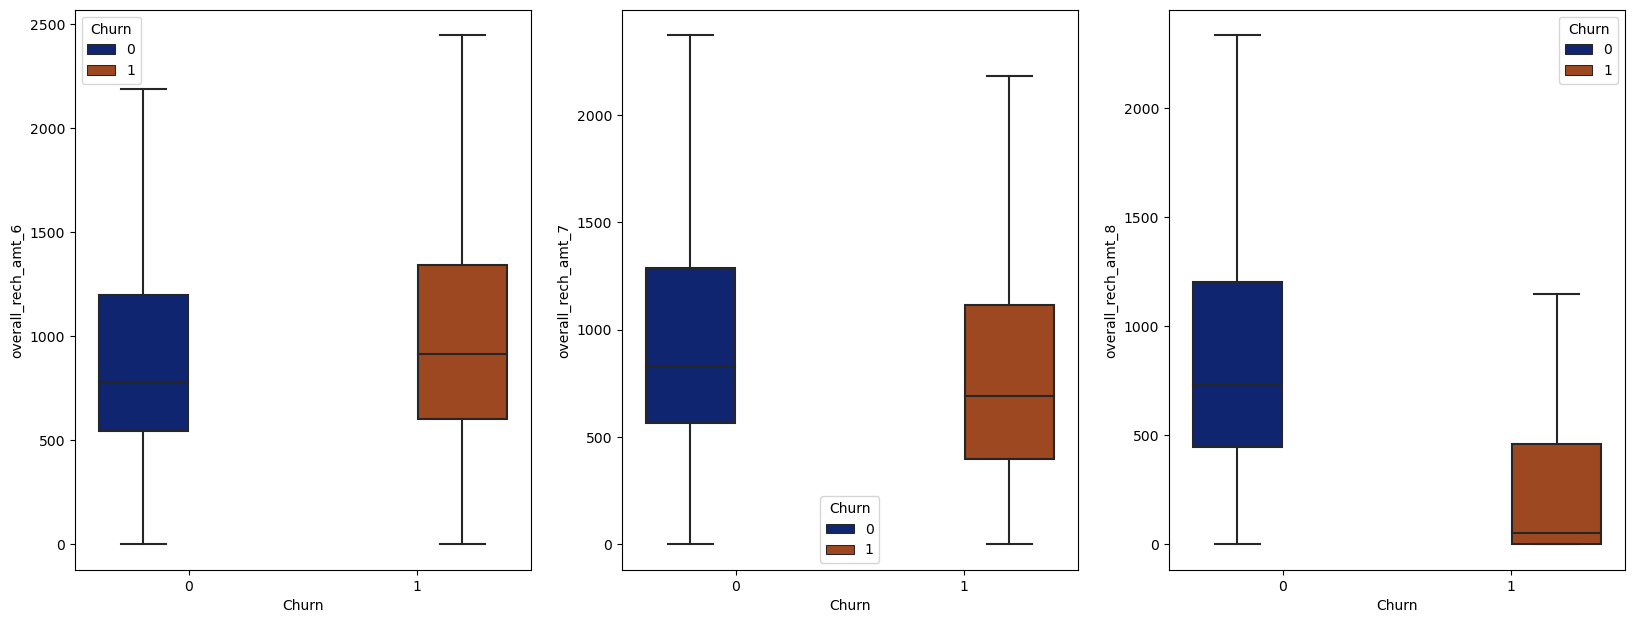

In [53]:
#visualising the variation in 3 months for overall recharge amount

chart_boxplot('overall_rech_amt')

Observation: We can also see a drop of the overall recharge( both calling and data) amount by the  churned customers in the 8th Month (Action Phase).

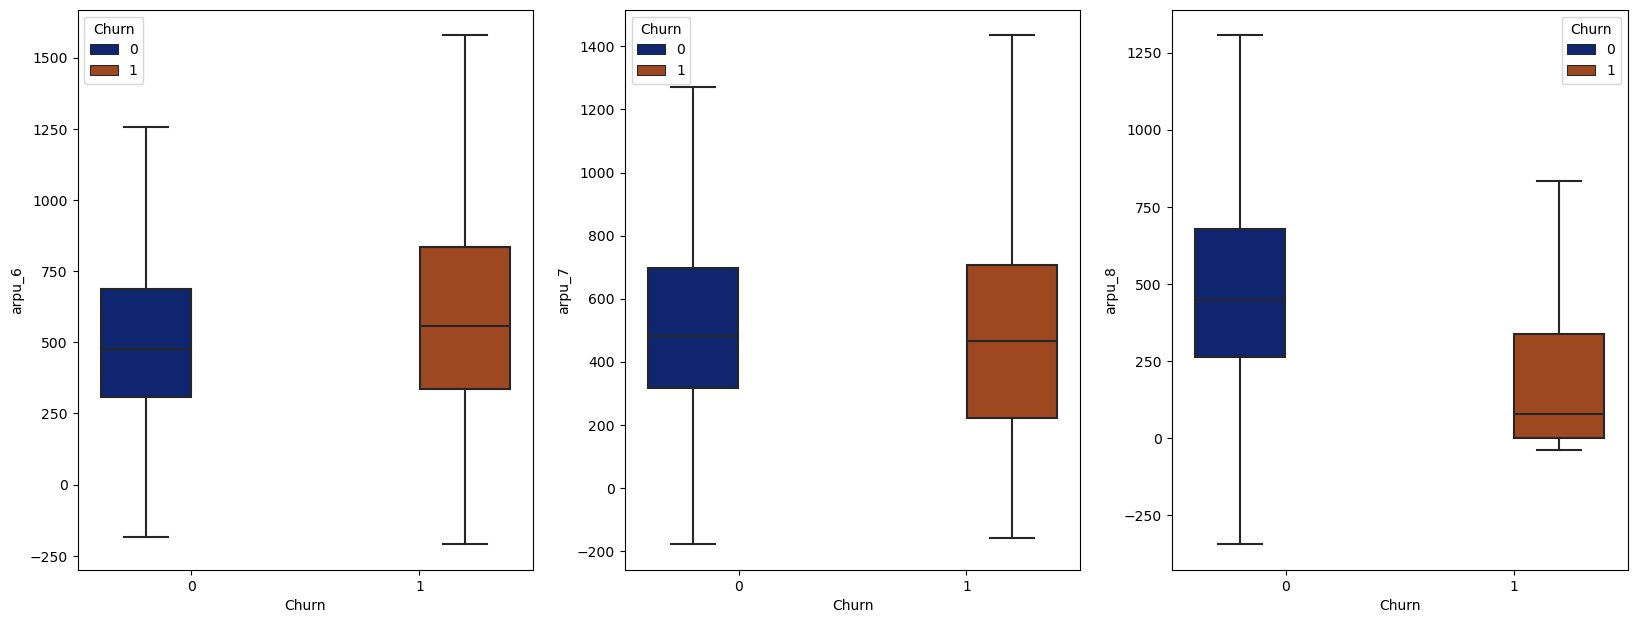

In [54]:
# #visualising the variation in 3 months for Average revenue per user

chart_boxplot('arpu')

Observation: Average revenue per user has also dropped significantly inthe 8th month as we have seen earlier that they have reduced their recharging amount.

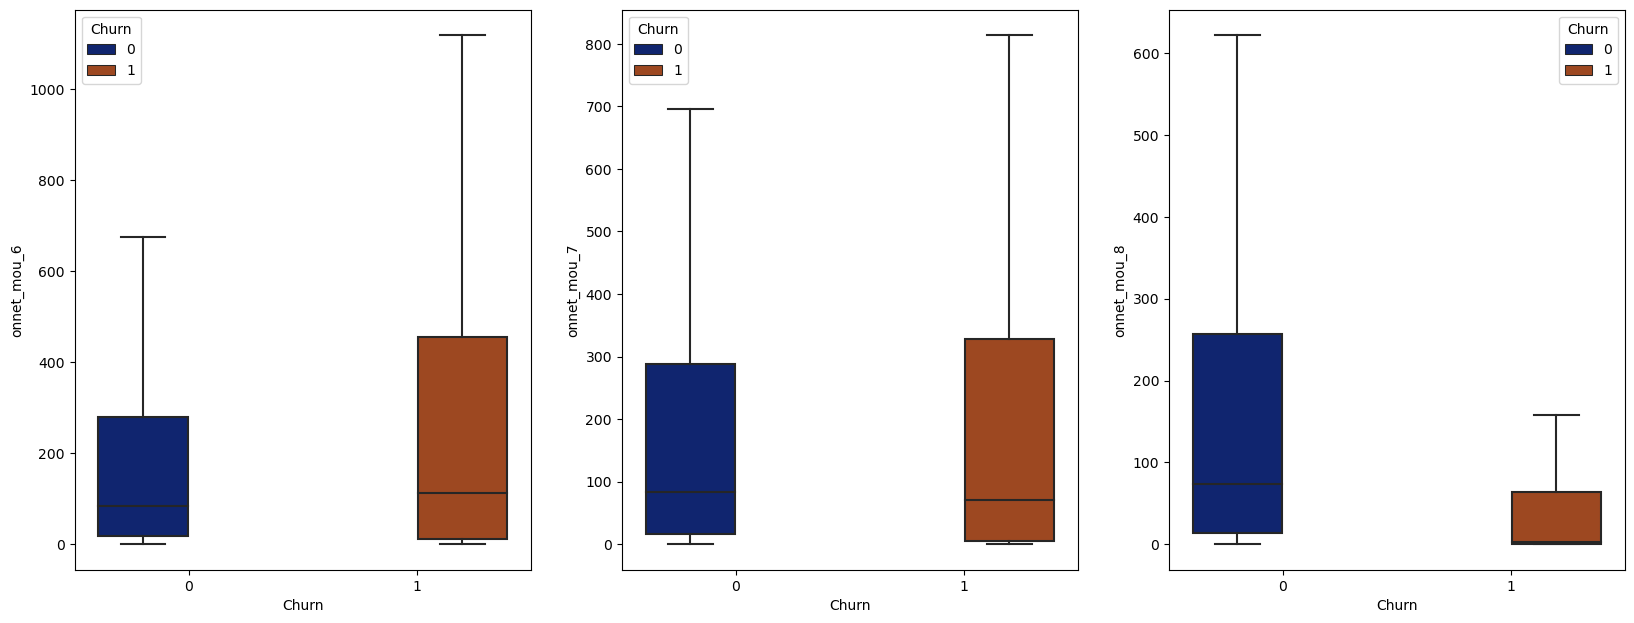

In [55]:
#visualising the variation of minutes of usage in 3 months for all kind of calls within the same operator network

chart_boxplot('onnet_mou')

Observation: Minutes of usage  of calls within the same operator network has incresed for non churn customers in 8th month compared to other months whereas for the churn customers it has dropped signifivantly

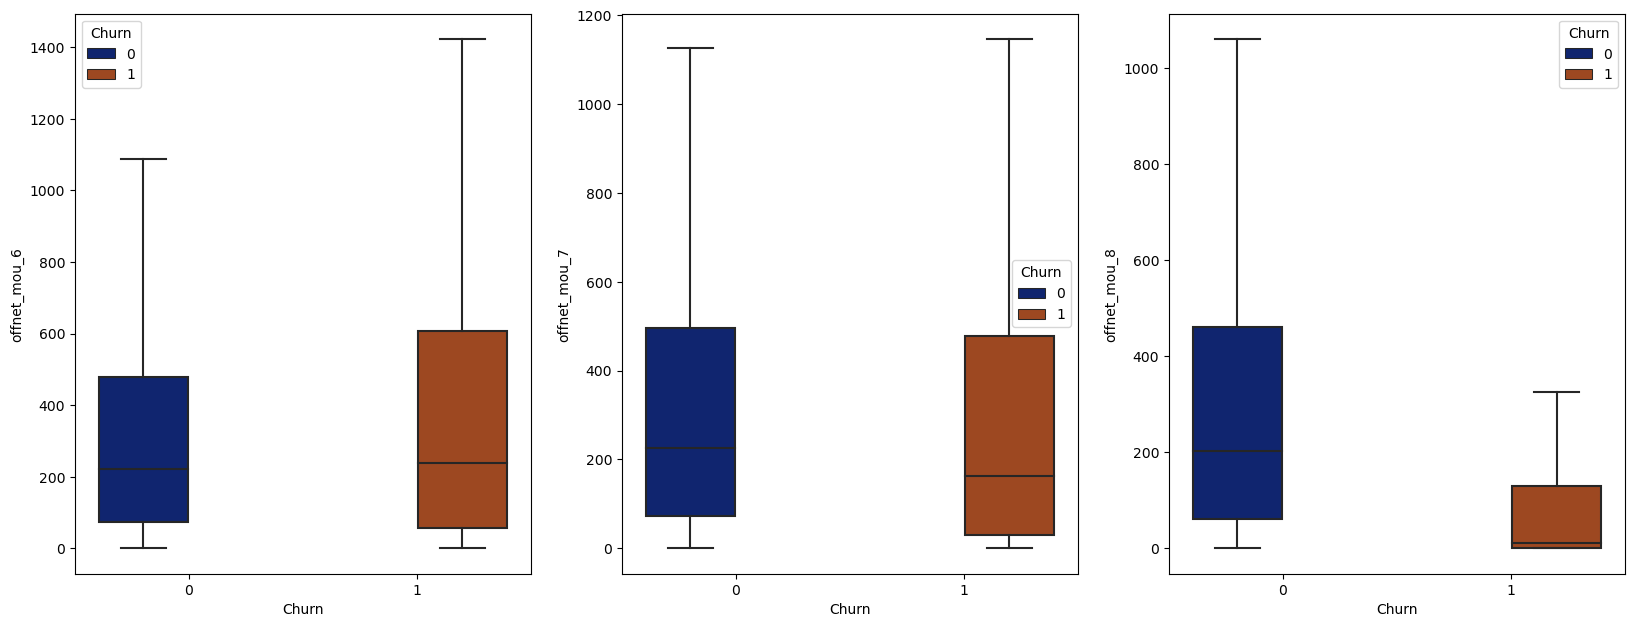

In [56]:
#visualising the variation of minutes of usage in 3 months for all kind of calls outside the operator T network
chart_boxplot('offnet_mou')

Observation: All kind of calls outside the operator T network has also dropped significantly in the 8th month as customers have reduced the calling service

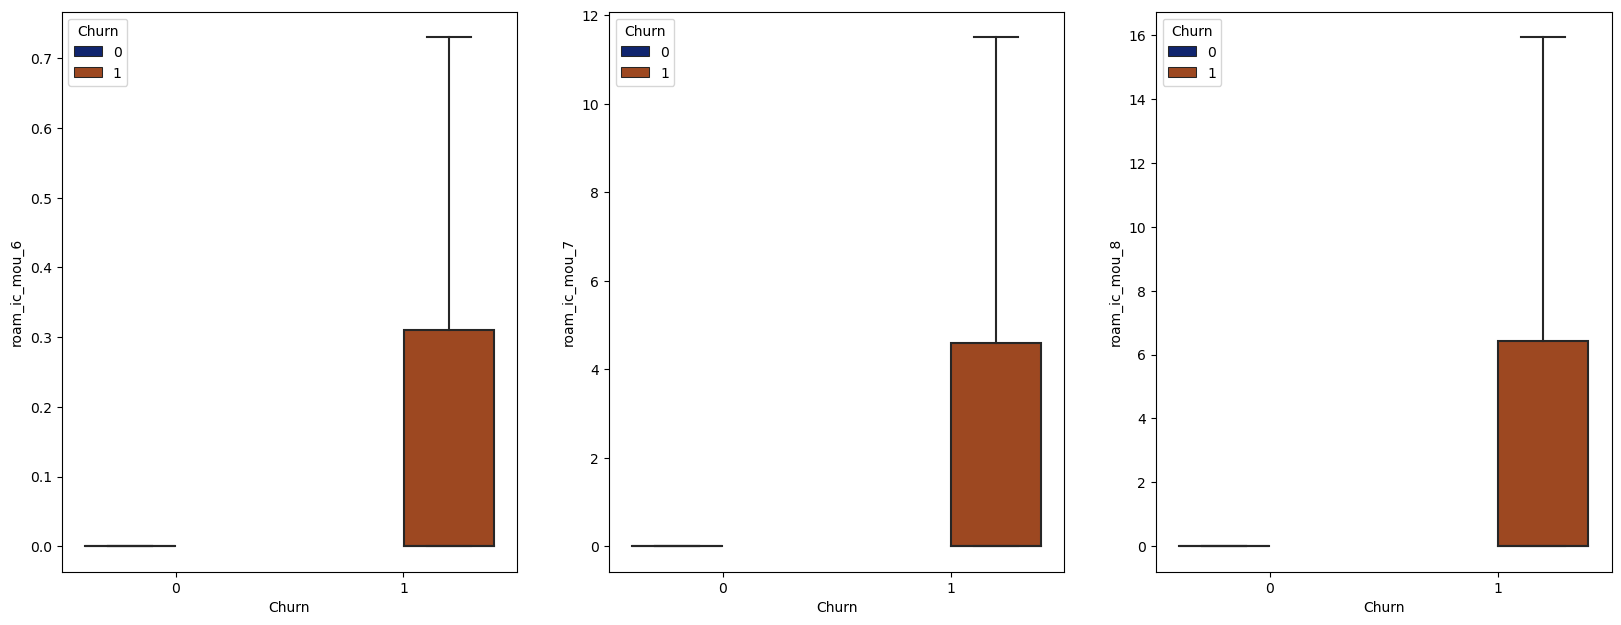

In [57]:
#visualising the variation  of minutes of usage  in 3 months for the customers using incoming calls when  in roaming zone 
chart_boxplot('roam_ic_mou')

 Observation: Something good insight can be taken ,where in roaming the non churned customers have not used any incoming services wheres the churned users have used the services and it it almost same in all the 3 months,

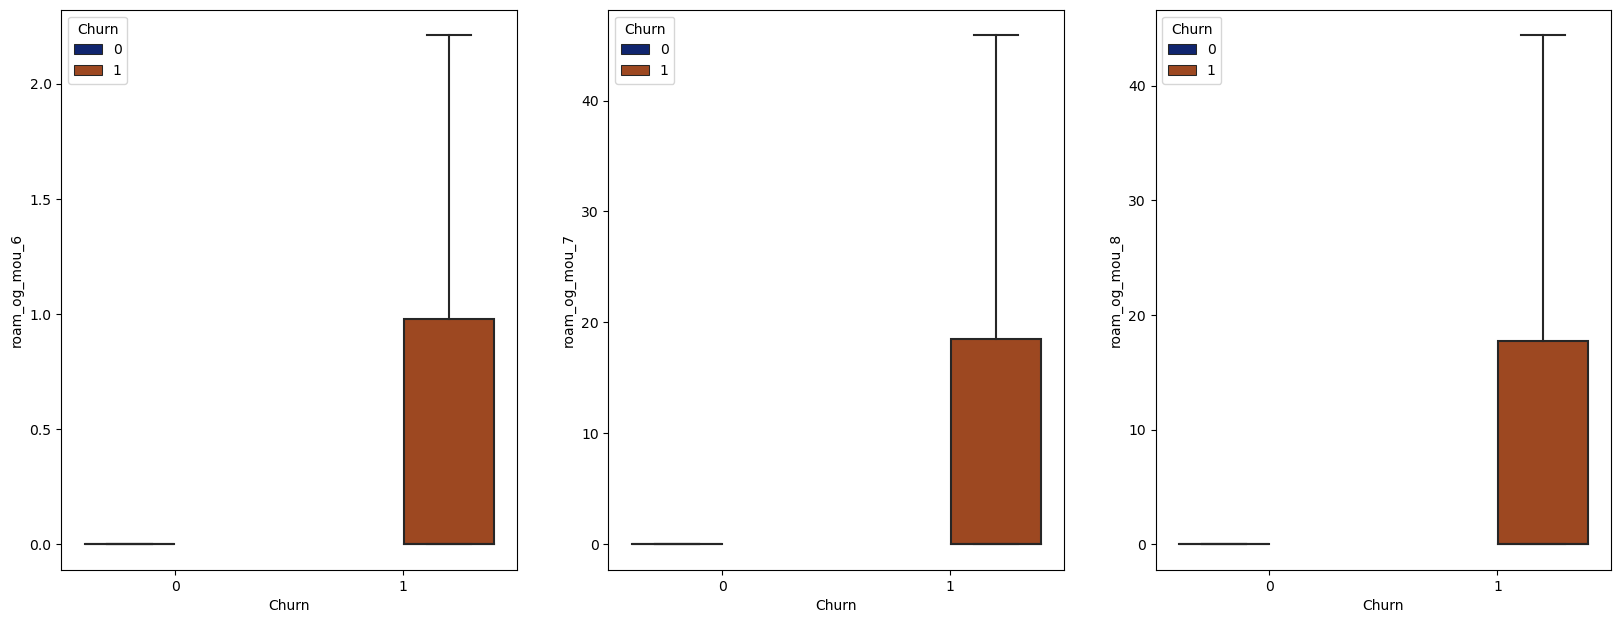

In [58]:
#visualising the variation of minutes of usage in 3 months for the customers using outging calls when  in roaming zone 
chart_boxplot('roam_og_mou')

Observation: Same like incoming , non churned customers have not used any outgoing services in roaming whereas the churned users have used the services and it it almost same in all the 3 months,which implies that churned travellers had used the telecom service while travelling.

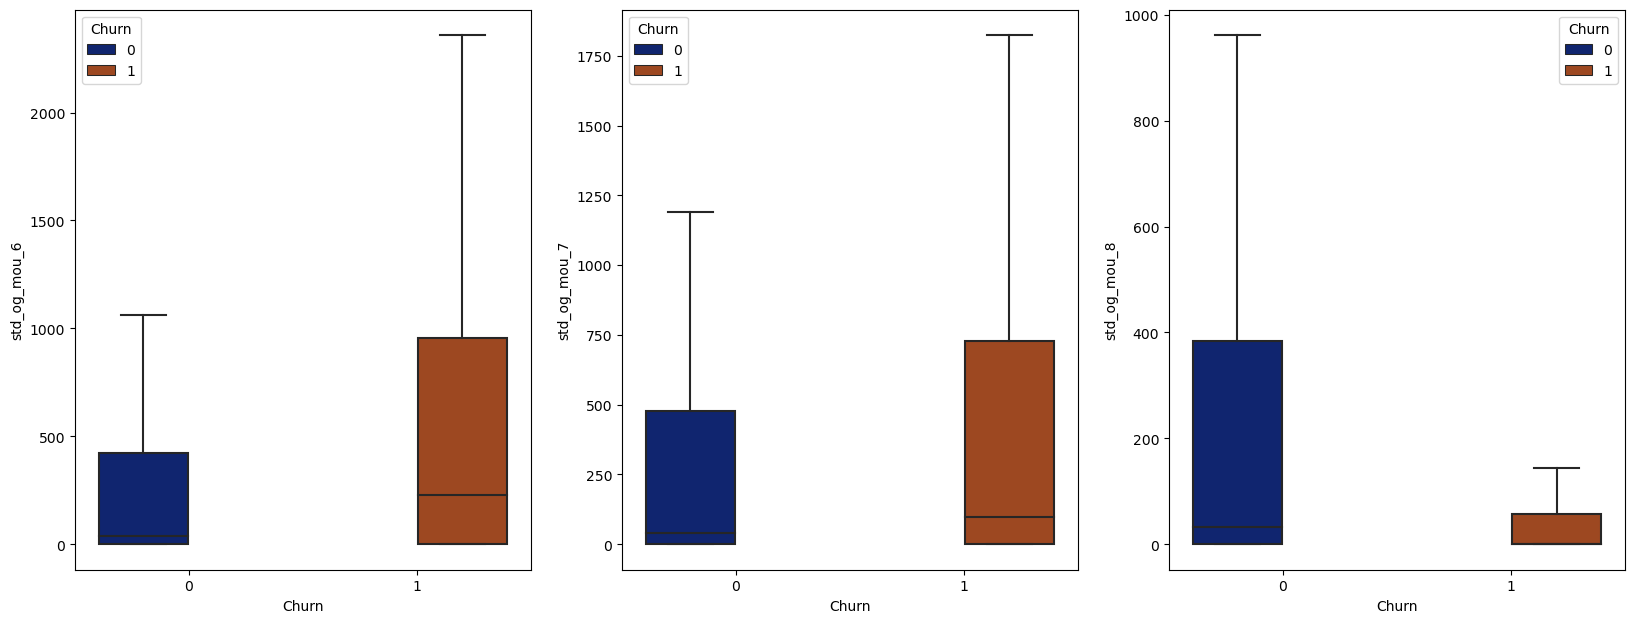

In [59]:
#visualising the variation of minutes of usage in 3 months for the customers using outging calls of STD calls - outside the calling circle
chart_boxplot('std_og_mou')

Observation:Minutes of usage of  STD outgoing calls had shown an increase for non churned customers dropped significantly for churned customers in th 8th month

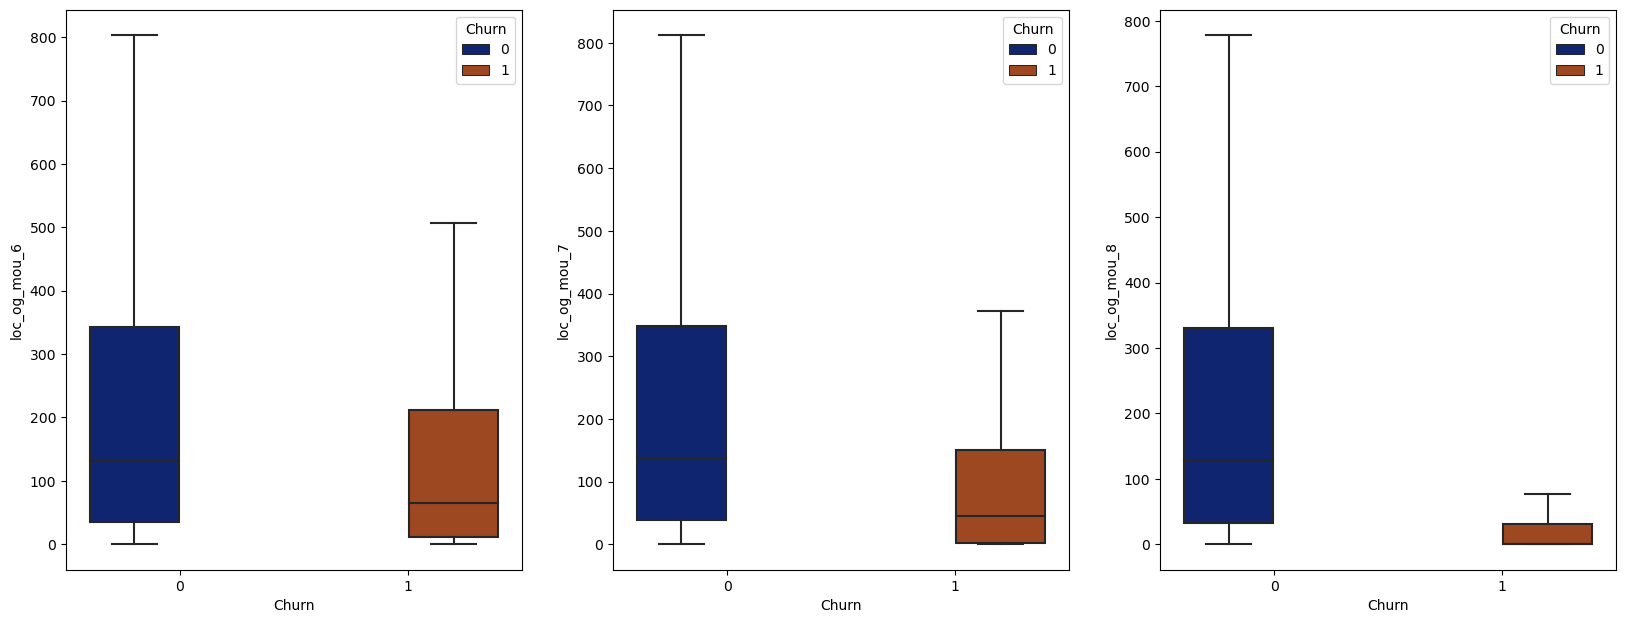

In [60]:
#visualising the variation in 3 months for the customers using outging  Local calls - within same telecom circle
chart_boxplot('loc_og_mou')

Observation: We can also see  minutes of usage of local outgoing calls by the churned customers in the 8th Month (Action Phase) has also dropped.

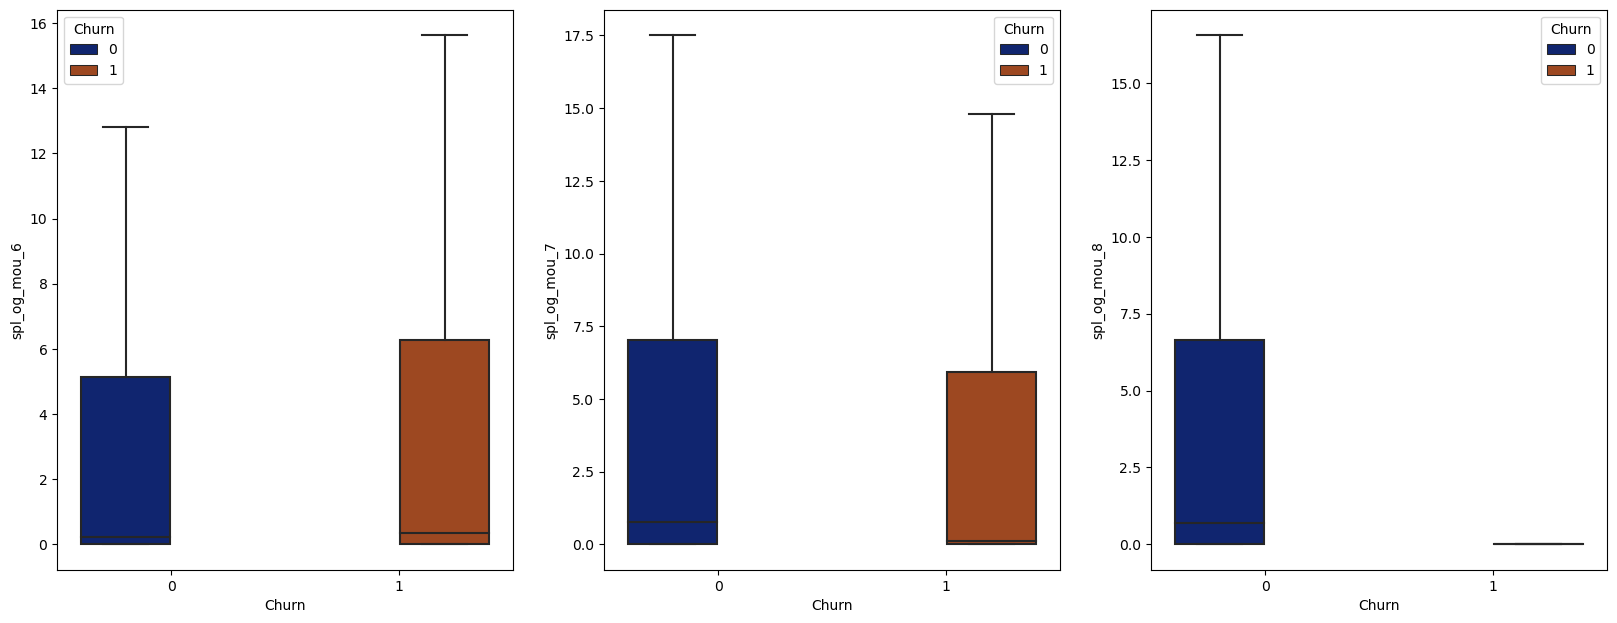

In [61]:
#visualising the variation of minutes of usage in 3 months for the customers using special calls
chart_boxplot('spl_og_mou')

Observation: The curned customers had not gone for any special call in 8th month

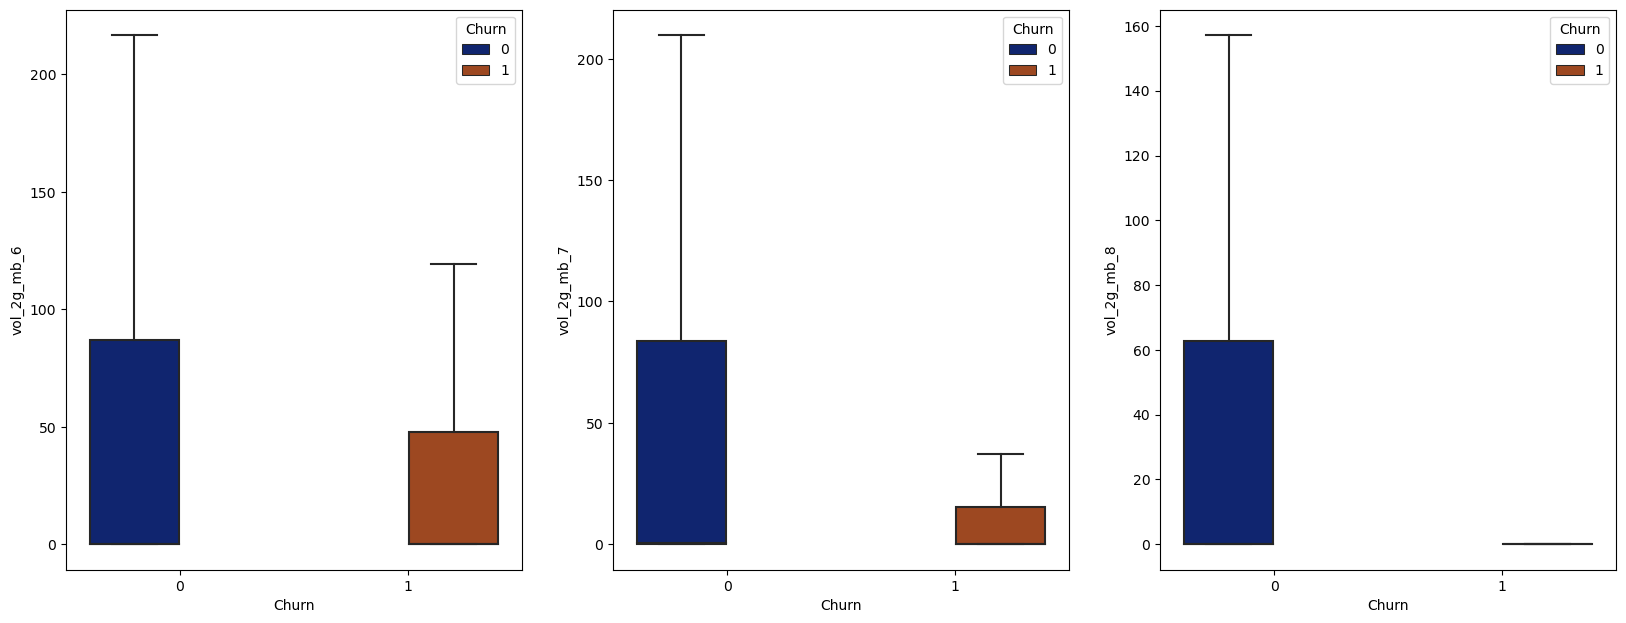

In [62]:
#visualising the variation in 3 months for the customers using Mobile internet usage volume (in MB)-2G
chart_boxplot('vol_2g_mb')

Obseravation: The Internet usage has also reduced by the churned customers in th 8th month

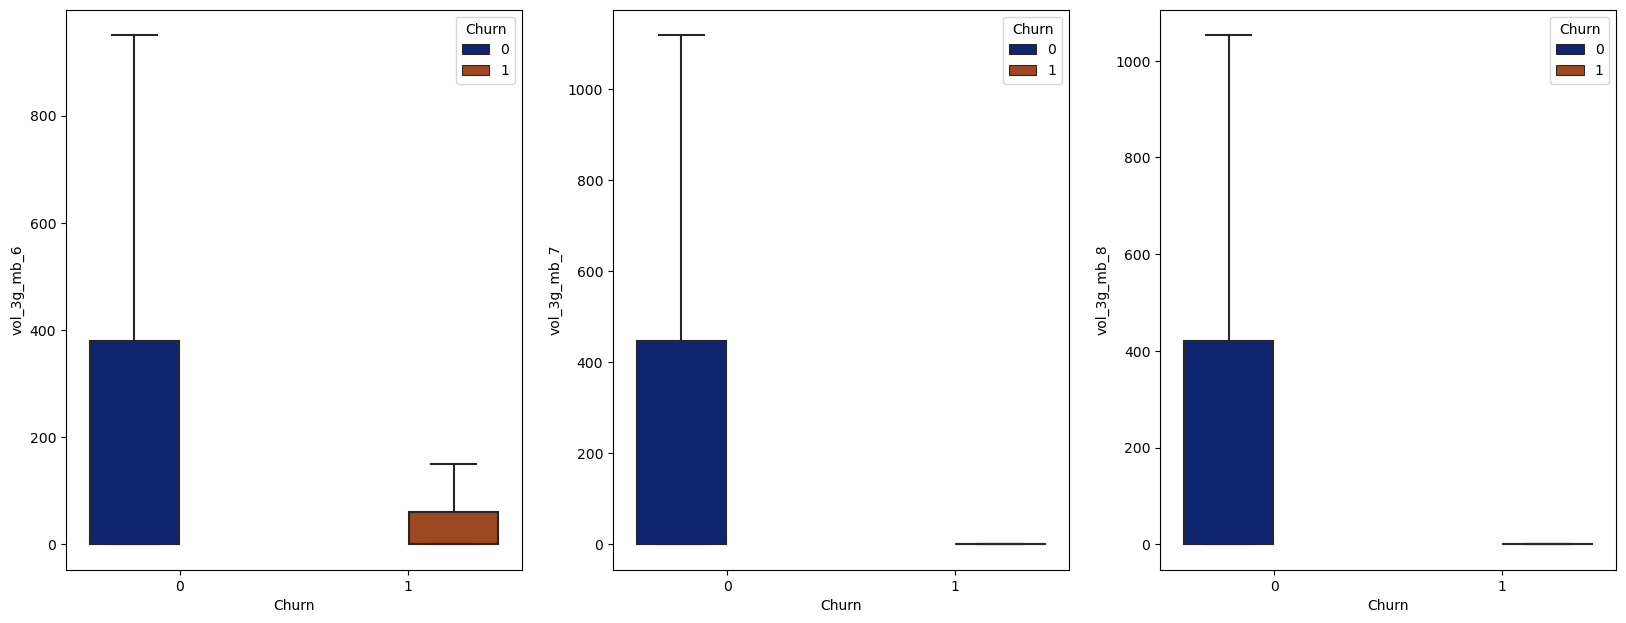

In [63]:

#visualising the variation in 3 months for the customers using Mobile internet usage volume (in MB)-3G
chart_boxplot('vol_3g_mb')

Observation: The churned customers have not used the internet 3G connection in 7th and 8th month, which could indicate that unavailability of the 3G network in the place of use could be reason for churning.

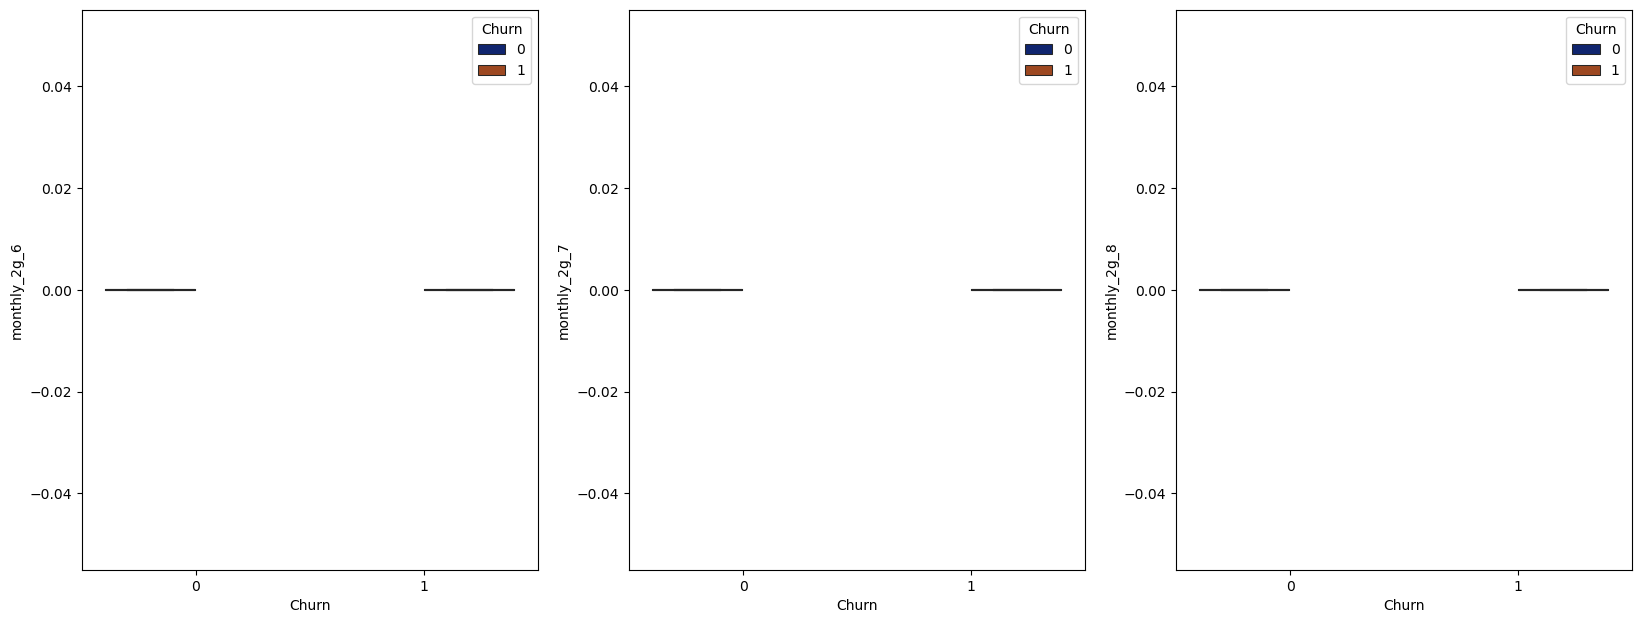

In [64]:
# Ploting for monthly subscription :
chart_boxplot('monthly_2g')

Observation:Value range is very low, hence graph is not giving us proper justification result .Hence doing analysis by checking mean value.

In [65]:
# lets check the data usage in much broader way:
monthly_subcription_2g_3g = telecom_hvc.columns[telecom_hvc.columns.str.contains('monthly_2g|monthly_3g',regex=True)]
monthly_subcription_2g_3g.tolist()

['monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8']

In [66]:
telecom_hvc[monthly_subcription_2g_3g].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   monthly_2g_6  29953 non-null  int64
 1   monthly_2g_7  29953 non-null  int64
 2   monthly_2g_8  29953 non-null  int64
 3   monthly_3g_6  29953 non-null  int64
 4   monthly_3g_7  29953 non-null  int64
 5   monthly_3g_8  29953 non-null  int64
dtypes: int64(6)
memory usage: 1.6 MB


In [67]:
#Bivariate Anaysis
def chart_mean_bar_plot(df, columns_list):
    df_0 = df[df.Churn == 0].filter(columns_list)
    df_1 = df[df.Churn == 1].filter(columns_list)

    mean_df_0 = pd.DataFrame([df_0.mean()], index=['Non Churn'])
    mean_df_1 = pd.DataFrame([df_1.mean()], index=['Churn'])

    frames = [mean_df_0, mean_df_1]
    mean_bar = pd.concat(frames)

    mean_bar.T.plot.bar(figsize=(10, 5), rot=0)
    plt.show()

    return mean_bar


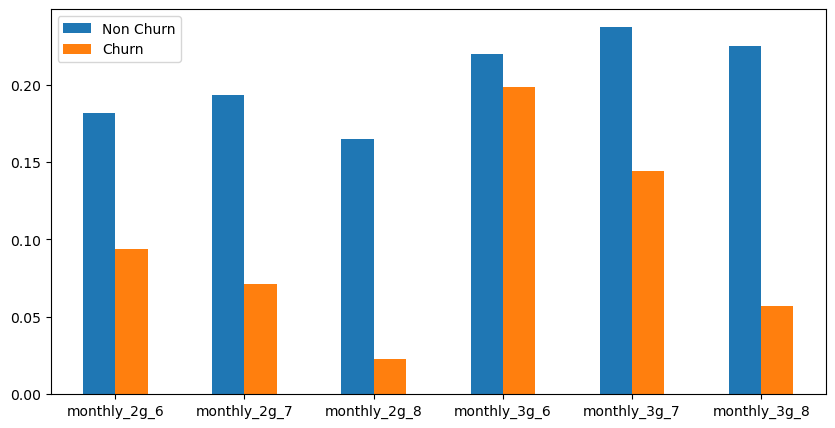

monthly_2g_6  monthly_2g_7  monthly_2g_8  monthly_3g_6  \
Non Churn      0.181613      0.193096      0.165080      0.219840   
Churn          0.093711      0.071106      0.023017      0.198109   

           monthly_3g_7  monthly_3g_8  
Non Churn      0.236882      0.224891  
Churn          0.144266      0.057131

In [68]:
chart_mean_bar_plot(telecom_hvc, monthly_subcription_2g_3g)

Observation:Again we can see a drop in monthly subscription for churned customers in 8th Month.

In [69]:
#segregating the columns related to minutes of usage related columns
onnet_usage_service =  telecom_hvc.columns[telecom_hvc.columns.str.contains('^onnet.*mou',regex=True)]
onnet_usage_service

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8'], dtype='object')

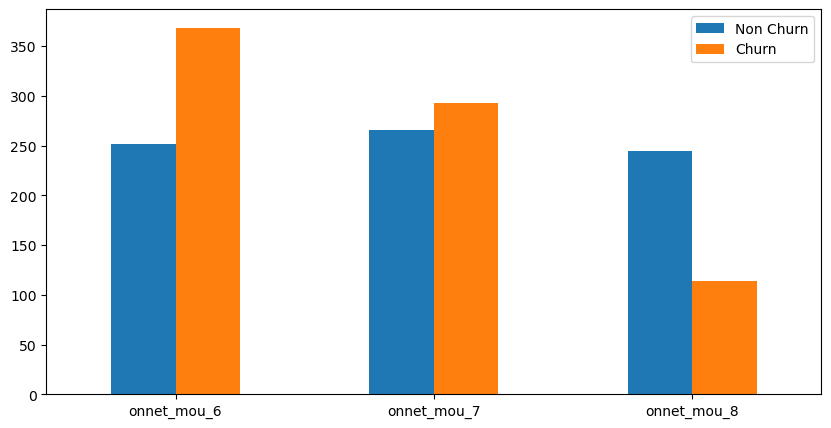

onnet_mou_6  onnet_mou_7  onnet_mou_8
Non Churn   251.374116   265.859670   245.030935
Churn       368.659420   292.846601   113.478011

In [70]:
chart_mean_bar_plot(telecom_hvc, onnet_usage_service)

In [71]:
offnet_usage_services=telecom_hvc.columns[telecom_hvc.columns.str.contains('^offnet.*mou',regex=True)]

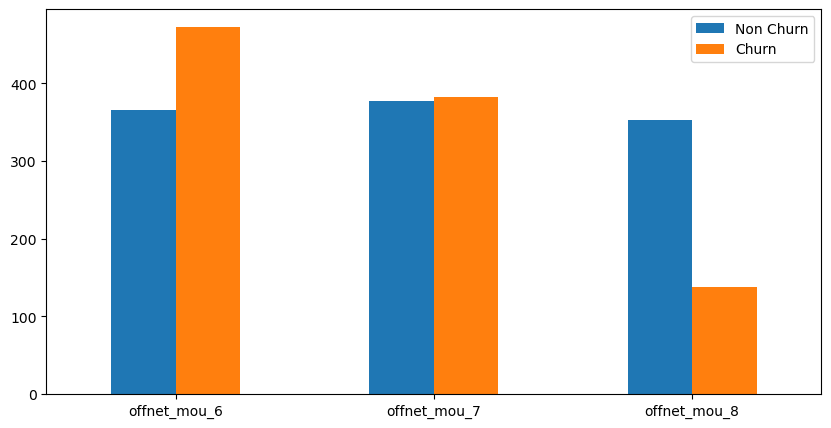

offnet_mou_6  offnet_mou_7  offnet_mou_8
Non Churn    365.123076    377.875572    352.504090
Churn        471.950838    382.277222    138.523181

In [72]:
chart_mean_bar_plot(telecom_hvc, offnet_usage_services)

Observation: Both offnet and onnet services had significantly reduced for churned customers over 8th months

In [73]:
# Checking Service schemes with validity smaller than a month for 2G/3G
SC_2g_3g_col = telecom_hvc.columns[telecom_hvc.columns.str.contains('sachet_2g|sachet_3g',regex=True)]

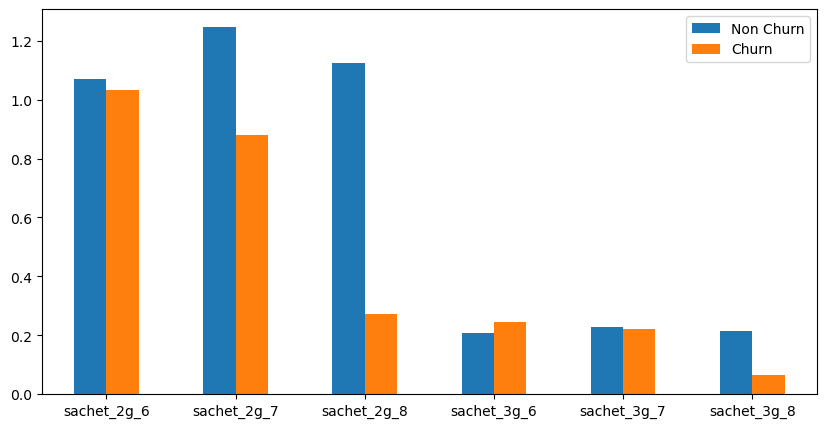

sachet_2g_6  sachet_2g_7  sachet_2g_8  sachet_3g_6  sachet_3g_7  \
Non Churn     1.070531     1.245203     1.125145     0.206577     0.228307   
Churn         1.032470     0.879984     0.270859     0.244554     0.221948   

           sachet_3g_8  
Non Churn     0.214571  
Churn         0.065351

In [74]:
chart_mean_bar_plot(telecom_hvc,SC_2g_3g_col)

Observation:We can see the drop in sachet services in 8th month for churned cutsomers

**Multicollinearity checking**

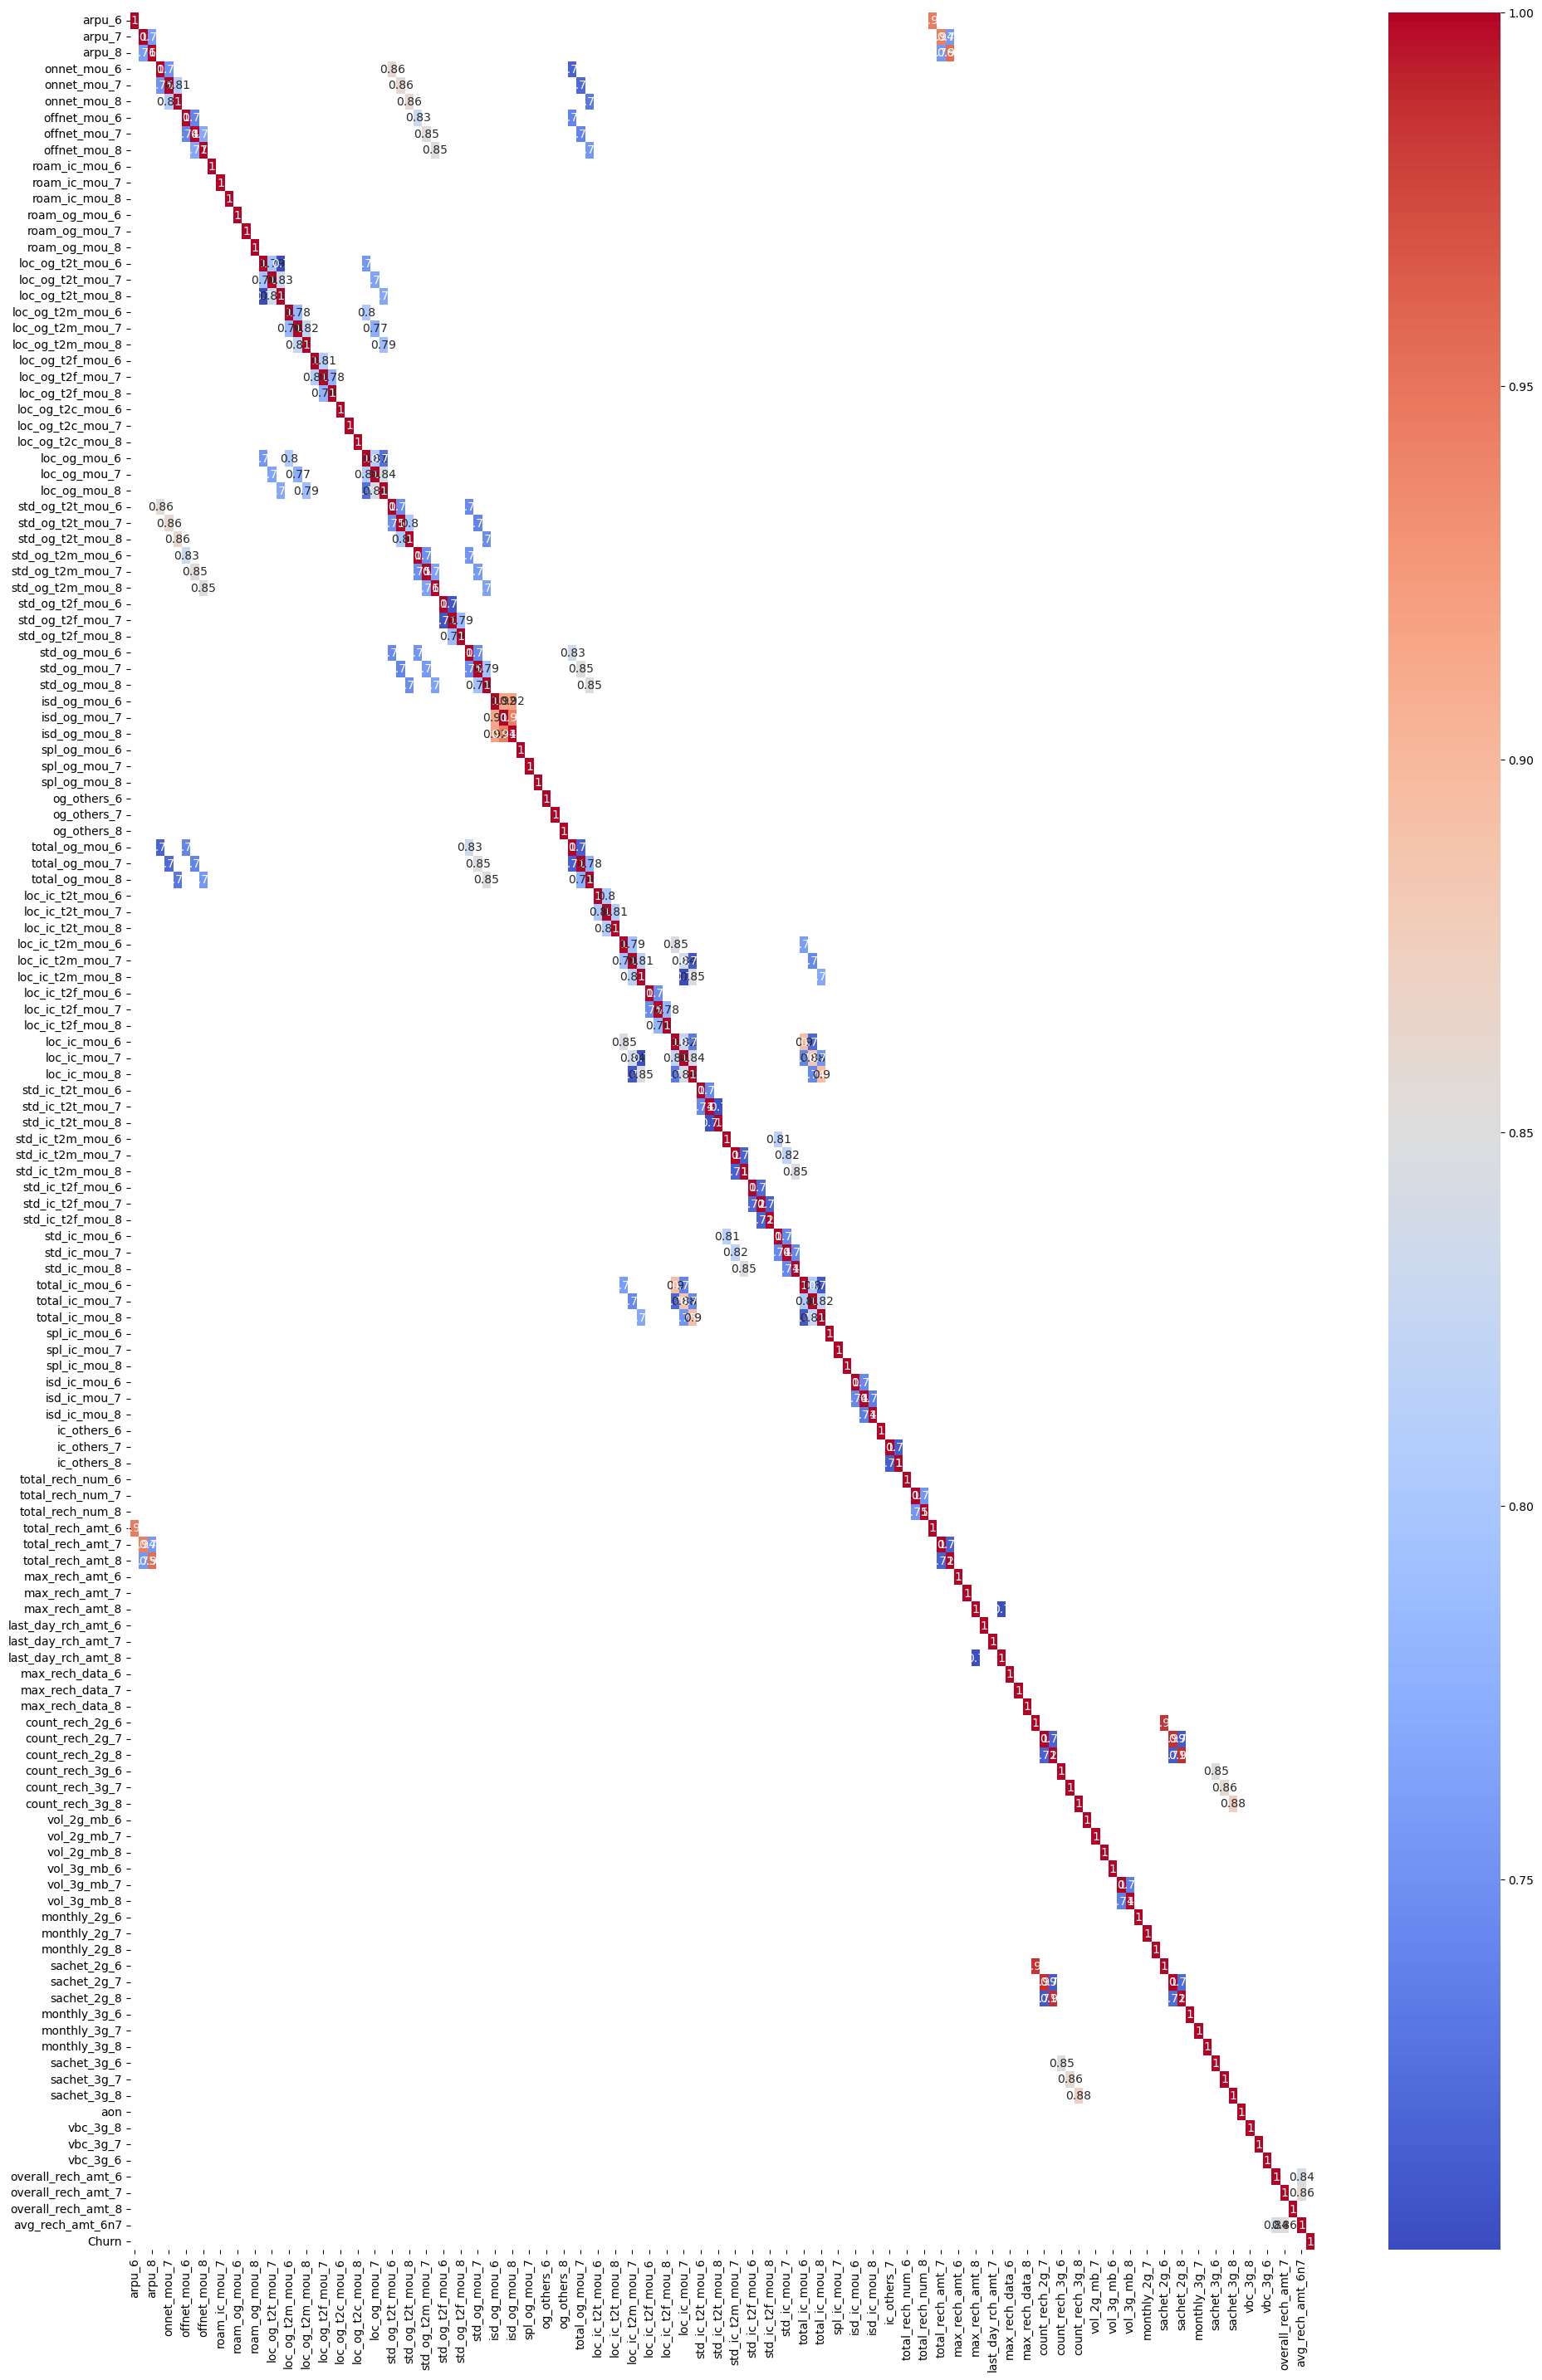

In [75]:
# Create a heatmap
corr_matrix = telecom_hvc.corr()
threshold = 0.7
mask = abs(corr_matrix) >= threshold

plt.figure(figsize=(23, 35))
sns.heatmap(corr_matrix[mask], annot=True,cmap='coolwarm')
plt.show()

In [76]:
# Multicollinearity checking

def heatmap(x,y,dataframe):
    plt.figure(figsize=(x,y))
    sns.heatmap(dataframe.corr(),cmap="OrRd",annot=True)
    plt.show()

In [77]:
# checking for multicollinearity for outgoing calls
mou_og_cols6 = telecom_hvc.columns[telecom_hvc.columns.str.contains('.*_og_.*mou_6',regex=True)]

In [78]:
telecom_hvc.loc[:,mou_og_cols6].describe()

roam_og_mou_6  loc_og_t2t_mou_6  loc_og_t2m_mou_6  loc_og_t2f_mou_6  \
count   29953.000000      29953.000000      29953.000000      29953.000000   
mean       26.596033         84.574122        163.309546          6.348347   
std       116.274169        228.962993        250.218928         22.139546   
min         0.000000          0.000000          0.000000          0.000000   
25%         0.000000          4.380000         19.210000          0.000000   
50%         0.000000         24.360000         77.260000          0.000000   
75%         0.000000         78.060000        209.030000          4.230000   
max      3775.110000       6431.330000       4729.740000       1466.030000   

       loc_og_t2c_mou_6  loc_og_mou_6  std_og_t2t_mou_6  std_og_t2m_mou_6  \
count      29953.000000  29953.000000      29953.000000      29953.000000   
mean           1.577380    254.240239        165.897941        179.439168   
std            6.308138    378.546516        403.990737        409.143255   
min            0.000000      0.000000          0.000000          0.000000   
25%            0.000000     32.260000          0.000000          0.000000   
50%            0.000000    124.590000          2.710000         16.360000   
75%            0.000000    332.310000        109.560000        154.540000   
max          271.440000  10643.380000       7366.580000       8314.760000   

       std_og_t2f_mou_6  std_og_mou_6  isd_og_mou_6  spl_og_mou_6  \
count      29953.000000  29953.000000  29953.000000  29953.000000   
mean           1.806292    347.147123      2.174995      5.825077   
std           11.988810    608.845412     45.888834     17.579228   
min            0.000000      0.000000      0.000000      0.000000   
25%            0.000000      0.400000      0.000000      0.000000   
50%            0.000000     45.080000      0.000000      0.230000   
75%            0.000000    465.290000      0.000000      5.210000   
max          628.560000   8432.990000   5900.660000   1023.210000   

       total_og_mou_6  
count    29953.000000  
mean       610.058005  
std        691.178402  
min          0.000000  
25%        116.640000  
50%        410.630000  
75%        859.030000  
max      10674.030000

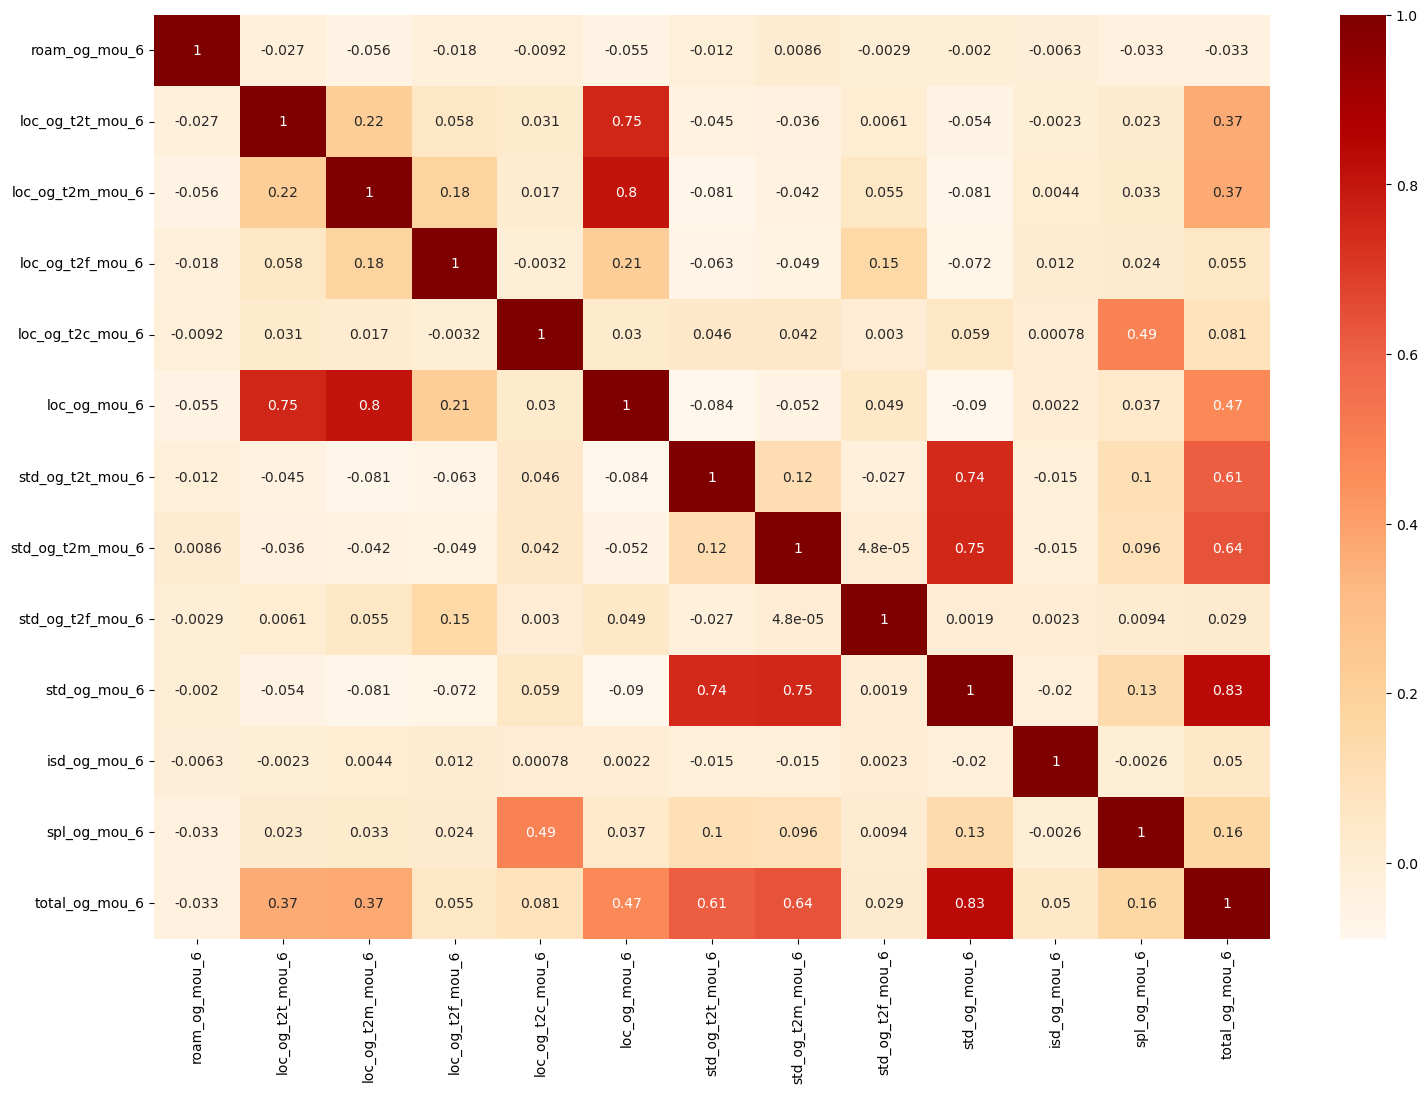

In [79]:
# checking with heatmap
heatmap(18,12,telecom_hvc.filter(mou_og_cols6))

Observation:Analysis: We can see that total_og_mou_6, std_og_mou_6 and loc_og_mou_6 seems to have strong correlation with other fileds and hence it is better to drop them avoid any multicolinearity issues.

We can see that total_og_mou_6, std_og_mou_6 and loc_og_mou_6 is a combination of other variables present in dataset.So we can remove these columns for all months from the data set

In [80]:
# dropping the columns:

list_og_cols = telecom_hvc.columns[telecom_hvc.columns.str.contains('total_og_mou|std_og_mou|loc_og_mou',regex=True)]
print(list_og_cols)
telecom_hvc.drop(list_og_cols,axis=1,inplace=True)

Index(['loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_mou_6',
       'std_og_mou_7', 'std_og_mou_8', 'total_og_mou_6', 'total_og_mou_7',
       'total_og_mou_8'],
      dtype='object')


In [81]:
# checking for multicollinearity for incoming calls
mou_ic_cols6 = telecom_hvc.columns[telecom_hvc.columns.str.contains('.*_ic_.*mou_6',regex=True)]

In [82]:
telecom_hvc.loc[:,mou_ic_cols6].describe()

roam_ic_mou_6  loc_ic_t2t_mou_6  loc_ic_t2m_mou_6  loc_ic_t2f_mou_6  \
count   29953.000000      29953.000000      29953.000000      29953.000000   
mean       16.124001         65.508916        150.474219         15.291721   
std        76.344227        163.855393        219.321437         45.785255   
min         0.000000          0.000000          0.000000          0.000000   
25%         0.000000          6.100000         28.090000          0.000000   
50%         0.000000         25.080000         84.110000          1.840000   
75%         0.000000         67.480000        188.740000         11.980000   
max      2613.310000       6351.440000       4693.860000       1678.410000   

       loc_ic_mou_6  std_ic_t2t_mou_6  std_ic_t2m_mou_6  std_ic_t2f_mou_6  \
count  29953.000000      29953.000000      29953.000000      29953.000000   
mean     231.284489         14.896832         29.212448          2.698829   
std      315.005426         77.750215         98.279300         19.114766   
min        0.000000          0.000000          0.000000          0.000000   
25%       47.910000          0.000000          0.000000          0.000000   
50%      134.560000          0.380000          5.000000          0.000000   
75%      297.260000          8.190000         23.630000          0.110000   
max     7454.630000       5459.560000       4630.230000       1351.110000   

       std_ic_mou_6  total_ic_mou_6  spl_ic_mou_6  isd_ic_mou_6  
count  29953.000000    29953.000000  29953.000000  29953.000000  
mean      46.811695      290.121569      0.061047     10.800999  
std      137.597749      365.739944      0.188124     76.789627  
min        0.000000        0.000000      0.000000      0.000000  
25%        1.030000       72.890000      0.000000      0.000000  
50%       11.410000      183.780000      0.000000      0.000000  
75%       41.490000      372.160000      0.000000      0.000000  
max     5459.630000     7716.140000     19.760000   6789.410000

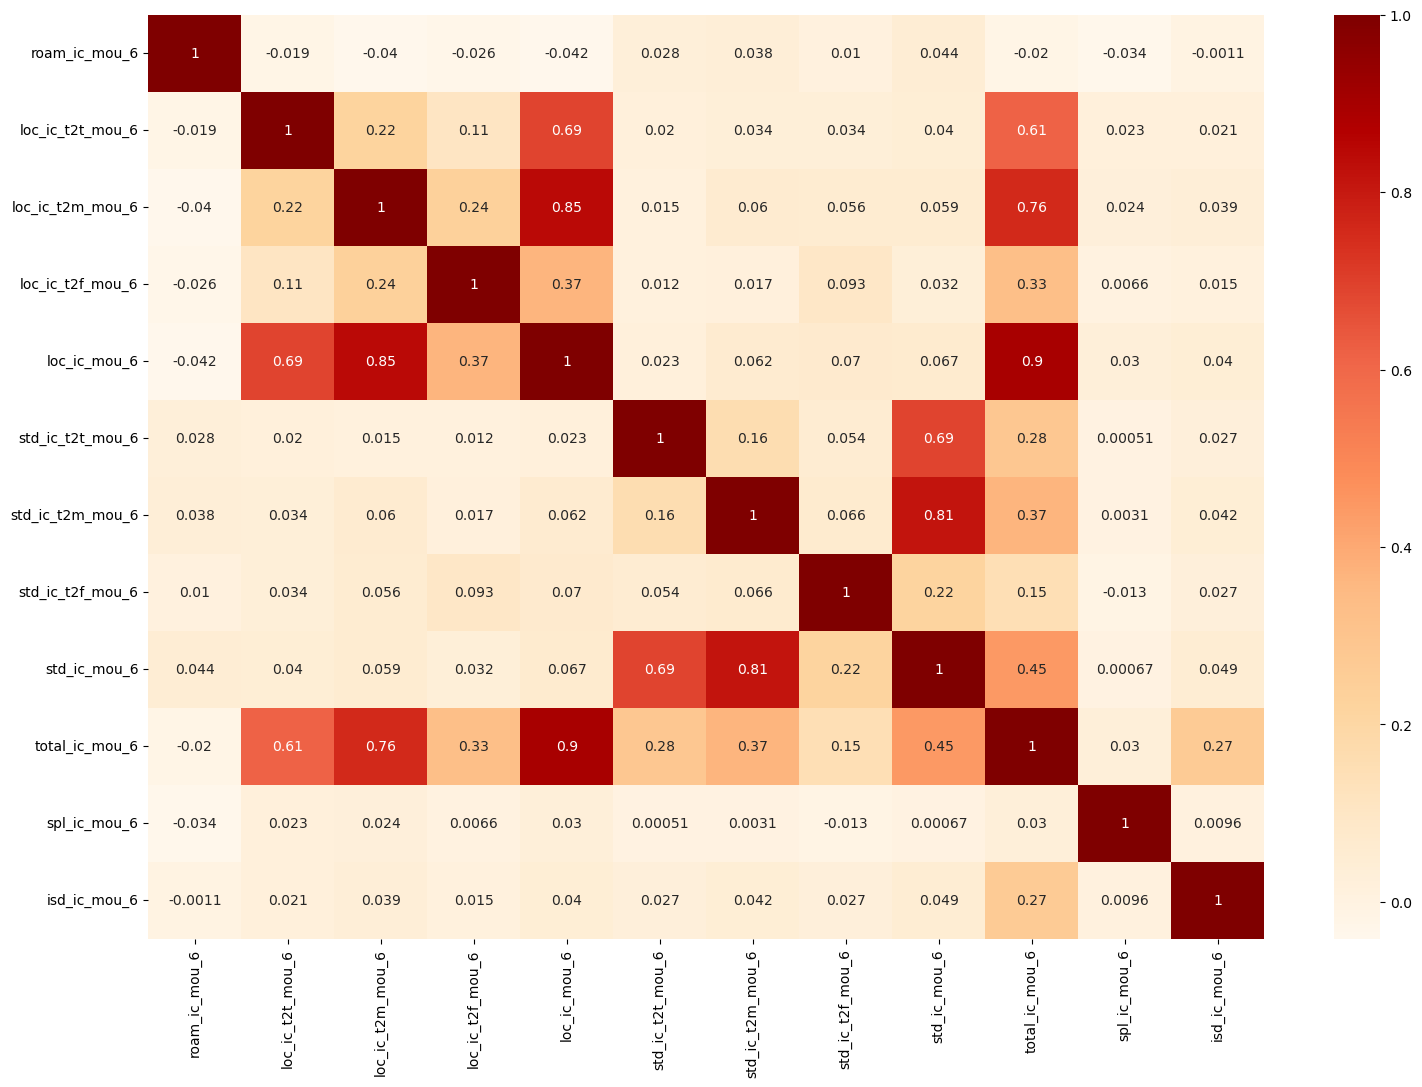

In [83]:
# checking with heatmap
heatmap(18,12,telecom_hvc.filter(mou_ic_cols6))

Observation:Analysis: We can see that total_ic_mou_6, std_ic_mou_6 and loc_ic_mou_6 seems to have strong correlation with other fileds and hence it is better to drop it to prevent multicollinearity issues.

We can see that total_ic_mou_6, std_ic_mou_6 and loc_ic_mou_6 is a combination of other variables present in dataset.So we can remove these columns for all months from the data set




In [84]:
# dropping the columns:

list_ic_cols = telecom_hvc.columns[telecom_hvc.columns.str.contains('total_ic_mou|std_ic_mou|loc_ic_mou',regex=True)]
print(list_ic_cols)
telecom_hvc.drop(list_ic_cols,axis=1,inplace=True)

Index(['loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_6',
       'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7',
       'total_ic_mou_8'],
      dtype='object')


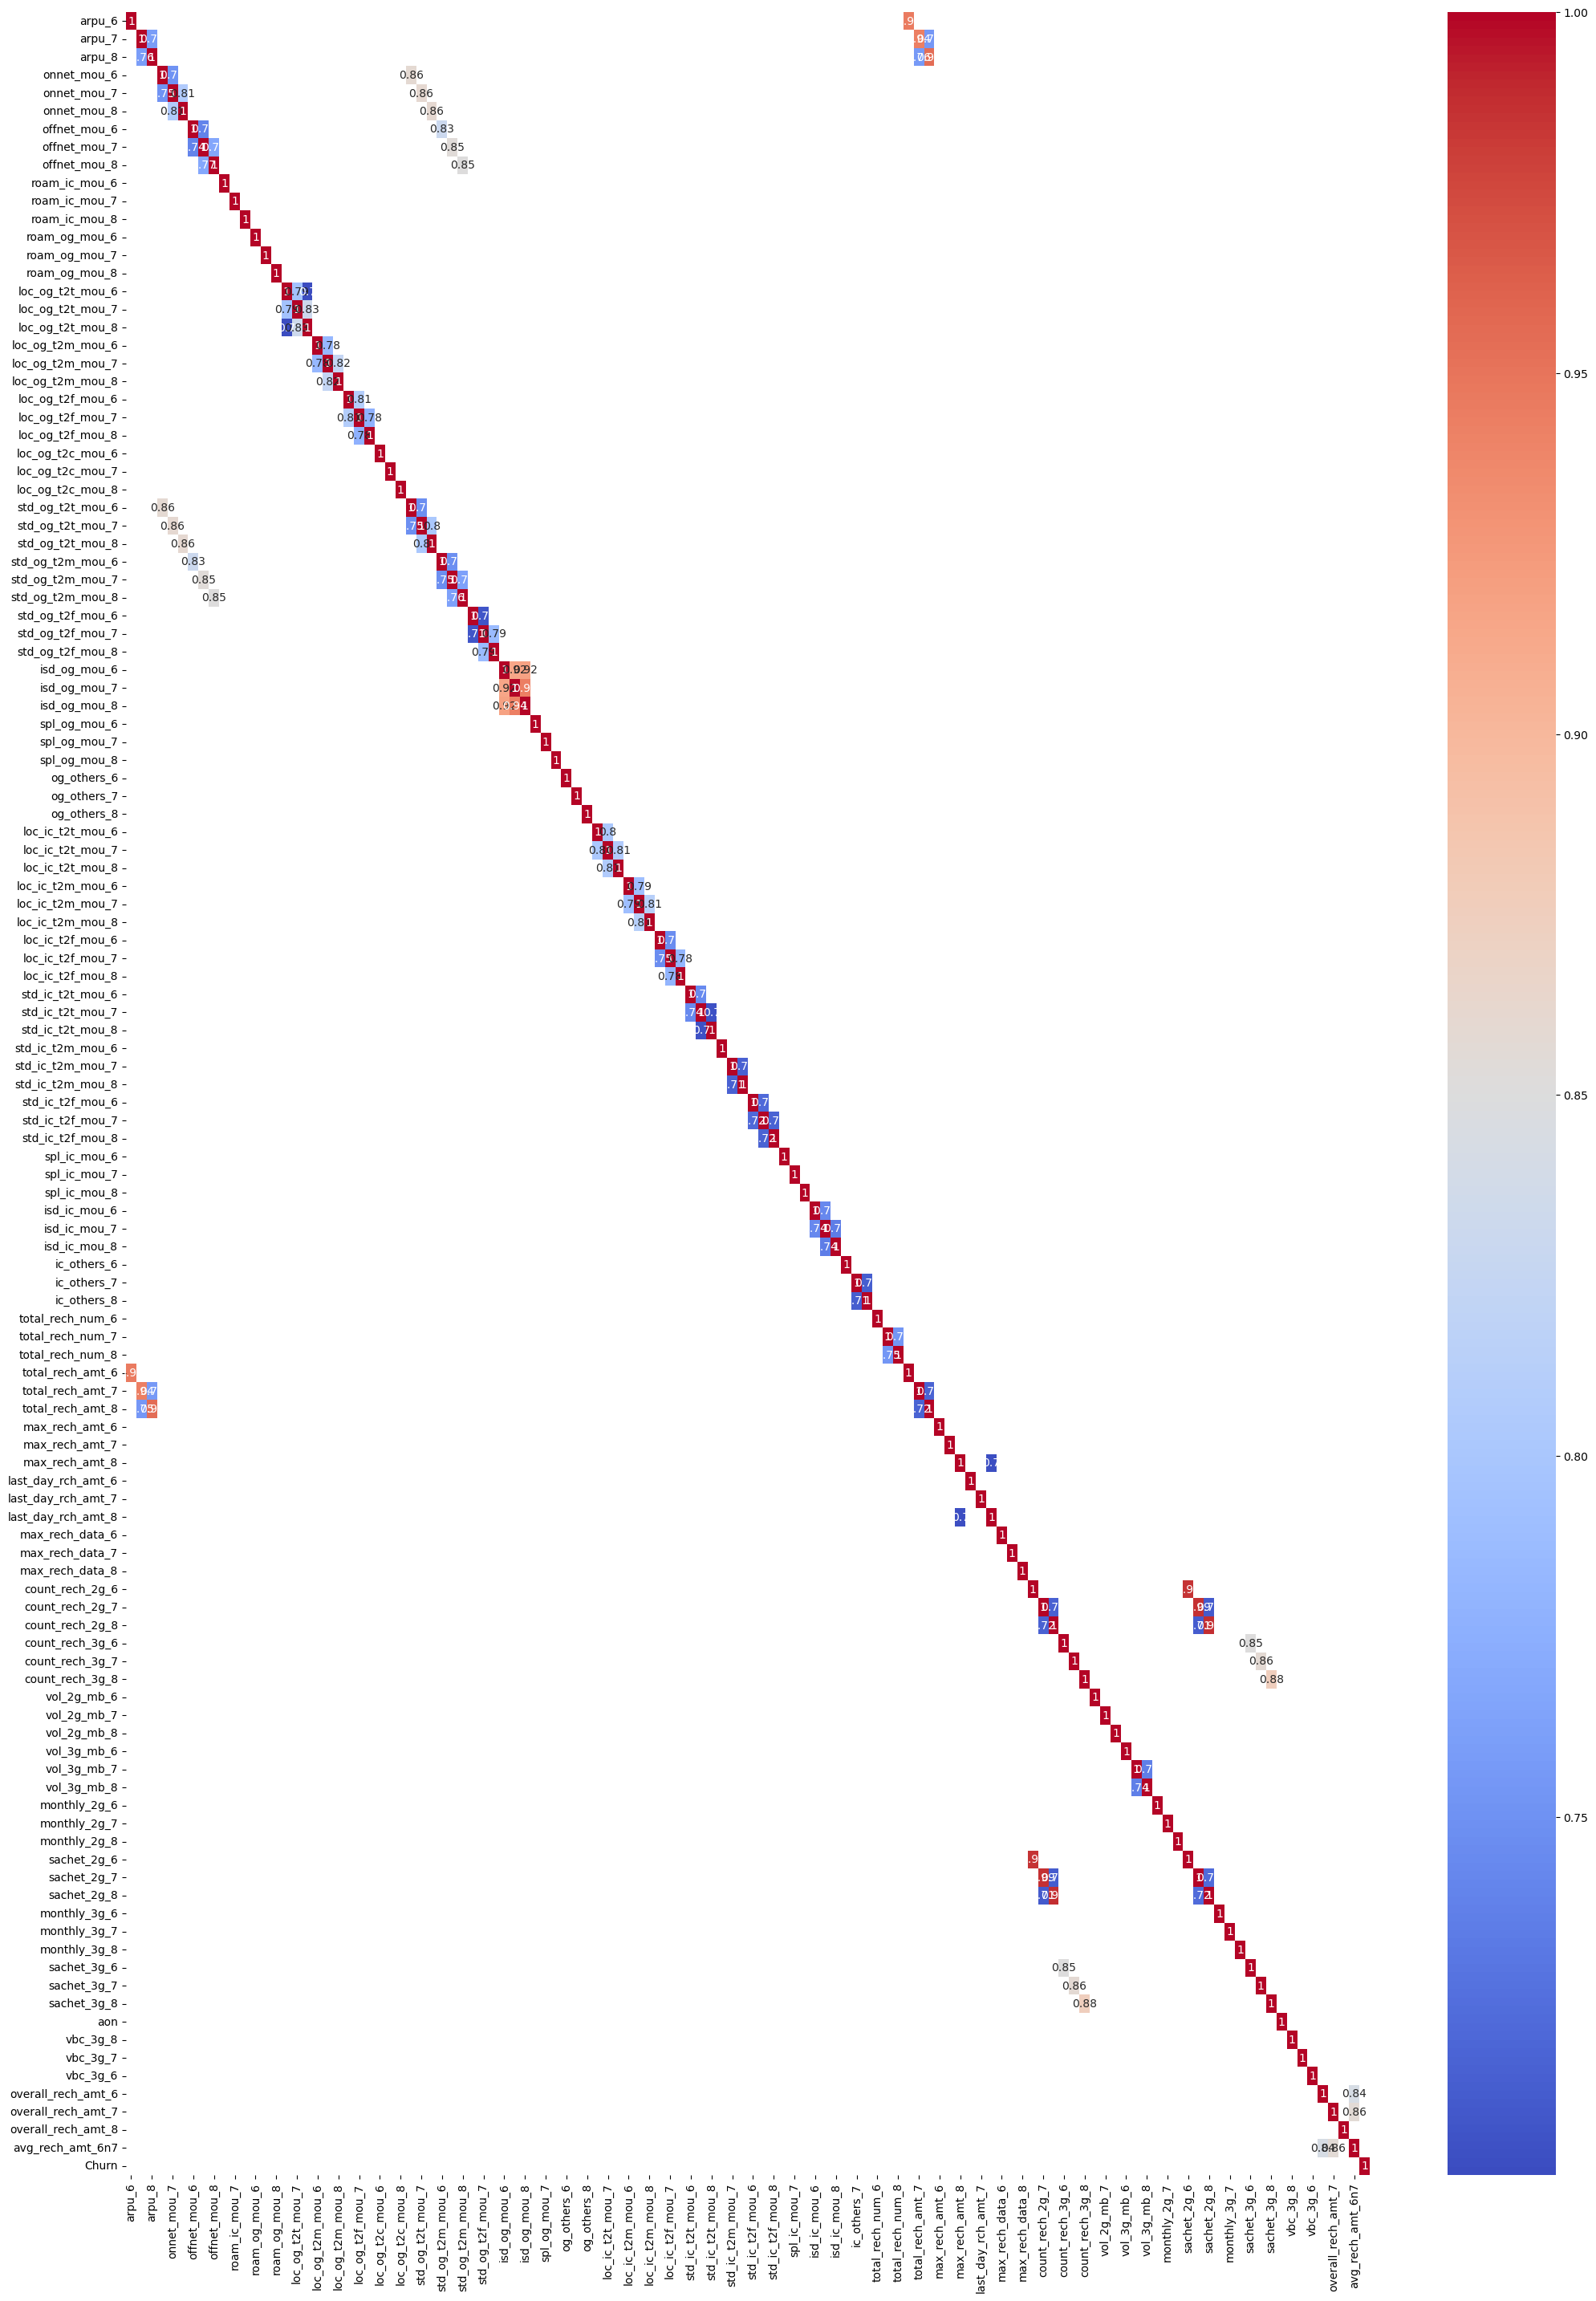

In [85]:
# again checking for multicollinearity
corr_matrix_1 = telecom_hvc.corr()
threshold = 0.7
mask = abs(corr_matrix_1) >= threshold

plt.figure(figsize=(25, 35))
sns.heatmap(corr_matrix_1[mask], annot=True,cmap='coolwarm')
plt.show()


In [86]:
telecom_hvc_corr_1=telecom_hvc.corr()
telecom_hvc_corr_1.loc[:,:] = np.tril(telecom_hvc_corr_1, k=-1)
telecom_hvc_corr_1= telecom_hvc_corr_1.stack()
telecom_hvc_corr_1[(telecom_hvc_corr_1 > 0.80) | (telecom_hvc_corr_1< -0.80)].sort_values(ascending=False)

sachet_2g_8       count_rech_2g_8       0.987175
sachet_2g_7       count_rech_2g_7       0.986423
sachet_2g_6       count_rech_2g_6       0.984939
total_rech_amt_8  arpu_8                0.955322
total_rech_amt_6  arpu_6                0.946104
total_rech_amt_7  arpu_7                0.943571
isd_og_mou_8      isd_og_mou_7          0.943120
                  isd_og_mou_6          0.918187
isd_og_mou_7      isd_og_mou_6          0.915247
sachet_3g_8       count_rech_3g_8       0.875300
std_og_t2t_mou_8  onnet_mou_8           0.860648
std_og_t2t_mou_7  onnet_mou_7           0.860314
std_og_t2t_mou_6  onnet_mou_6           0.859328
sachet_3g_7       count_rech_3g_7       0.857996
avg_rech_amt_6n7  overall_rech_amt_7    0.856237
std_og_t2m_mou_7  offnet_mou_7          0.854589
sachet_3g_6       count_rech_3g_6       0.851090
std_og_t2m_mou_8  offnet_mou_8          0.850904
avg_rech_amt_6n7  overall_rech_amt_6    0.842715
loc_og_t2t_mou_8  loc_og_t2t_mou_7      0.833078
std_og_t2m_mou_6  of

In [87]:
#segregating columns to drop
col_multi_corr= telecom_hvc.columns[telecom_hvc.columns.str.contains('arpu|count_rech_2g|std_og_t2t_mou|std_og_t2m_mou|isd_og_mou|loc_og_t2t|loc_og_t2m|loc_ic_t2t|loc_ic_t2m|count_rech_3g|avg_rech_amt_6n7',regex=True)]
col_multi_corr.tolist()

['arpu_6',
 'arpu_7',
 'arpu_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'avg_rech_amt_6n7']

In [88]:
#dropping the columns
telecom_hvc.drop(col_multi_corr,axis=1,inplace=True)

In [89]:
telecom_hvc.shape

(29953, 89)

### <font color = "red">Model Building

In [90]:
# making a copy of main dataset

telecom_hvc_1=telecom_hvc.copy()

In [91]:
telecom_hvc_1.shape

(29953, 89)

In [92]:
# Putting feature variable to X
X= telecom_hvc_1.drop(['Churn'],axis=1)

In [93]:
X.head()

onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  \
0          0.00         0.00         0.00          0.00          0.00   
7         57.84        54.68        52.29        453.43        567.16   
8        413.69       351.03        35.08         94.66         80.63   
21       102.41       132.11        85.14        757.93        896.68   
23        48.96        50.66        33.58         85.41         89.36   

    offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
0           0.00           0.00           0.00           0.00           0.00   
7         325.91          16.23          33.49          31.64          23.74   
8         136.48           0.00           0.00           0.00           0.00   
21        983.39           0.00           0.00           0.00           0.00   
23        205.89           0.00           0.00           0.00           0.00   

    roam_og_mou_7  roam_og_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0            0.00           0.00              0.00              0.00   
7           12.59          38.06             62.13             55.14   
8            0.00           0.00              0.00              0.00   
21           0.00           0.00              0.75              0.00   
23           0.00           0.00              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               0.00               0.0               0.0              0.00   
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
21              1.58               0.0               0.0              0.00   
23              0.00               0.0               0.0             17.71   

    std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  spl_og_mou_6  \
0               0.00              0.00              0.00           0.0   
7               6.66             20.08             16.68           4.5   
8               0.00              0.00              0.00           0.0   
21              0.00              0.00              0.00           0.0   
23              0.00              0.00              0.00           0.1   

    spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  \
0            0.0          0.00          0.0          0.0          0.0   
7            0.0          6.50          0.0          0.0          0.0   
8            0.0         10.23          0.0          0.0          0.0   
21           0.0          0.00          0.0          0.0          0.0   
23           0.0         17.71          0.0          0.0          0.0   

    loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  std_ic_t2t_mou_6  \
0               0.00              0.00              1.15              0.00   
7             152.16            101.46             39.53             36.89   
8               0.00              0.00              0.00              0.00   
21              4.61              2.84             10.39             14.06   
23              0.00              0.00              0.71              0.51   

    std_ic_t2t_mou_7  std_ic_t2t_mou_8  std_ic_t2m_mou_6  std_ic_t2m_mou_7  \
0               0.00              0.00              0.00              0.00   
7              11.83             30.39             91.44            126.99   
8               0.58              0.10             22.43              4.08   
21              5.98              0.18             67.69             38.23   
23              0.00             13.38              2.43             14.89   

    std_ic_t2m_mou_8  std_ic_t2f_mou_6  std_ic_t2f_mou_7  std_ic_t2f_mou_8  \
0               0.00              0.00              0.00              0.00   
7             141.33             52.19             34.24             22.21   
8               0.65              0.00              0.00              0.00   
21            101.74              0.00          

In [94]:
# Putting response variable to y
y = telecom_hvc_1['Churn']

y.head()

0     1
7     1
8     0
21    0
23    0
Name: Churn, dtype: int64

In [95]:
# Splitting th edata into train and split

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=100)

In [96]:
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

Dimension of X_train: (20967, 88)
Dimension of X_test: (8986, 88)


In [97]:
X_train.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20967 entries, 16686 to 18760
Data columns (total 88 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   onnet_mou_6         20967 non-null  float64
 1   onnet_mou_7         20967 non-null  float64
 2   onnet_mou_8         20967 non-null  float64
 3   offnet_mou_6        20967 non-null  float64
 4   offnet_mou_7        20967 non-null  float64
 5   offnet_mou_8        20967 non-null  float64
 6   roam_ic_mou_6       20967 non-null  float64
 7   roam_ic_mou_7       20967 non-null  float64
 8   roam_ic_mou_8       20967 non-null  float64
 9   roam_og_mou_6       20967 non-null  float64
 10  roam_og_mou_7       20967 non-null  float64
 11  roam_og_mou_8       20967 non-null  float64
 12  loc_og_t2f_mou_6    20967 non-null  float64
 13  loc_og_t2f_mou_7    20967 non-null  float64
 14  loc_og_t2f_mou_8    20967 non-null  float64
 15  loc_og_t2c_mou_6    20967 non-null  float64
 16  

**Data Imbalance Handling**

In [98]:
#checking the imbalance
telecom_hvc_1['Churn'].value_counts(normalize=True).reset_index()

index     Churn
0      0  0.918773
1      1  0.081227

Observation: Here we can see clear class imbalance as only 8.1% are churned customers against 91.8% of non churn.

In [99]:
print(y_train.value_counts())
y_train.value_counts(normalize = True).reset_index()

0    19215
1     1752
Name: Churn, dtype: int64


index    Churn
0      0  0.91644
1      1  0.08356

In [100]:
print(y_test.value_counts())
y_test.value_counts(normalize = True).reset_index()

0    8305
1     681
Name: Churn, dtype: int64


index     Churn
0      0  0.924215
1      1  0.075785

In [101]:
# Apply SMOTE to balance the training set
smt = SMOTE(random_state=45, k_neighbors=5)
X_train, y_train = smt.fit_resample(X_train, y_train)
len(X_train)

38430

In [102]:
print(sorted(Counter(y_train).items()))

[(0, 19215), (1, 19215)]


**Feature Scaling**

In [103]:
num_col = X_train.select_dtypes(include = ['int64','float64']).columns.tolist()

In [104]:
# applying the scaling on th datasetaset

scaler=MinMaxScaler()
X_train[num_col]=scaler.fit_transform(X_train[num_col])

In [105]:
X_train.head()

onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  \
0     0.029035     0.024658     0.018193      0.068875      0.079239   
1     0.050582     0.007706     0.000512      0.093112      0.015145   
2     0.000133     0.000032     0.000634      0.004294      0.000888   
3     0.207542     0.186757     0.183399      0.047336      0.020359   
4     0.002814     0.001083     0.003239      0.013618      0.005654   

   offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
0      0.086495       0.101733       0.141198       0.000000       0.107594   
1      0.000192       0.000000       0.000548       0.001705       0.000000   
2      0.005185       0.000000       0.000000       0.000000       0.000000   
3      0.024483       0.000000       0.000000       0.000000       0.000000   
4      0.013478       0.000000       0.000000       0.000000       0.000000   

   roam_og_mou_7  roam_og_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0       0.399951       0.000000          0.062722          0.001399   
1       0.000526       0.002316          0.005543          0.000000   
2       0.000000       0.000000          0.000000          0.000662   
3       0.000000       0.000000          0.000000          0.000879   
4       0.000000       0.000000          0.005248          0.000000   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0          0.006559               0.0          0.001755          0.023960   
1          0.000000               0.0          0.000369          0.000000   
2          0.000000               0.0          0.000000          0.000000   
3          0.000000               0.0          0.000000          0.000000   
4          0.048013               0.0          0.001053          0.016343   

   std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  spl_og_mou_6  \
0          0.002386               0.0          0.103867      0.000000   
1          0.012059               0.0          0.000000      0.009656   
2          0.000000               0.0          0.000000      0.000000   
3          0.000000               0.0          0.000000      0.001446   
4          0.000000               0.0          0.000000      0.010858   

   spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  \
0      0.000790      0.010756     0.001525          0.0          0.0   
1      0.036681      0.000000     0.006199          0.0          0.0   
2      0.000000      0.000013     0.000000          0.0          0.0   
3      0.000814      0.002284     0.000000          0.0          0.0   
4      0.011210      0.048713     0.000000          0.0          0.0   

   loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  std_ic_t2t_mou_6  \
0          0.008806          0.000000          0.028746          0.001382   
1          0.001764          0.000353          0.000000          0.010015   
2          0.002765          0.000000          0.000274          0.000000   
3          0.013131          0.028815          0.036131          0.001376   
4          0.000179          0.016344          0.034206          0.001896   

   std_ic_t2t_mou_7  std_ic_t2t_mou_8  std_ic_t2m_mou_6  std_ic_t2m_mou_7  \
0          0.001516          0.021665          0.008863          0.006460   
1          0.002561          0.000000          0.019893          0.064705   
2          0.000410          0.002255          0.000000          0.000580   
3          0.000108          0.000000          0.005725          0.007179   
4          0.000193          0.002110          0.002965          0.008849   

   std_ic_t2m_mou_8  std_ic_t2f_mou_6  std_ic_t2f_mou_7  std_ic_t2f_mou_8  \
0          0.038115          0.000000          0.000000          0.002803   
1          0.000000          0.033535          0.010167          0.000000   
2          0.000000          0.000000          0.000000          0.000000   
3          0.002308          0.000000          0.000000          0.000000   
4          0.007081   

Observation:
Scaling the test set
We don't fit scaler on the test set. We only transform the test set.

In [106]:
# Transform the test set
X_test[num_col] = scaler.transform(X_test[num_col])
X_test.head()

onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  \
48388     0.017039     0.026202     0.021324      0.065786      0.104046   
29754     0.000567     0.003581     0.002469      0.038776      0.030041   
50131     0.004905     0.006027     0.013197      0.002999      0.004692   
66630     0.000641     0.000947     0.001007      0.084308      0.055974   
91920     0.153719     0.075439     0.034820      0.064391      0.081426   

       offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
48388      0.075311       0.266995       0.148384       0.050432   
29754      0.021338       0.000000       0.000000       0.000000   
50131      0.005698       0.003321       0.000265       0.001616   
66630      0.043958       0.000000       0.000000       0.000000   
91920      0.026406       0.000000       0.000000       0.000000   

       roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2f_mou_6  \
48388       0.179023       0.352626       0.081089          0.000000   
29754       0.000000       0.000000       0.000000          0.009062   
50131       0.000172       0.000000       0.000265          0.000000   
66630       0.000000       0.000000       0.000000          0.000000   
91920       0.000000       0.000000       0.000000          0.000000   

       loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
48388          0.000548          0.009144          0.000000          0.001983   
29754          0.019311          0.001066          0.000000          0.000000   
50131          0.000000          0.000000          0.001658          0.002826   
66630          0.000000          0.000000          0.000000          0.000000   
91920          0.000000          0.000000          0.000000          0.000000   

       loc_og_t2c_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
48388          0.031350               0.0               0.0               0.0   
29754          0.000000               0.0               0.0               0.0   
50131          0.000000               0.0               0.0               0.0   
66630          0.000853               0.0               0.0               0.0   
91920          0.000000               0.0               0.0               0.0   

       spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  \
48388      0.000000      0.000000      0.000000     0.000000          0.0   
29754      0.000000      0.000000      0.004504     0.000000          0.0   
50131      0.000792      0.001272      0.000000     0.000000          0.0   
66630      0.000000      0.000237      0.059175     0.000000          0.0   
91920      0.011327      0.002828      0.005780     0.006789          0.0   

       og_others_8  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  \
48388          0.0          0.000000          0.001014          0.001576   
29754          0.0          0.049535          0.028825          0.028355   
50131          0.0          0.000643          0.000000          0.001514   
66630          0.0          0.001192          0.001921          0.006022   
91920          0.0          0.007793          0.000101          0.000349   

       std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  std_ic_t2m_mou_6  \
48388          0.000000          0.028131          0.046058          0.000000   
29754          0.000708          0.002066          0.000000          0.000000   
50131          0.004799          0.000000          0.005544          0.002119   
66630          0.000000          0.006537          0.020973          0.216957   
91920          0.000000          0.000032          0.000000          0.003274   

       std_ic_t2m_mou_7  std_ic_t2m_mou_8  std_ic_t2f_mou_6  std_ic_t2f_mou_7  \
48388          0.064960          0.067193          0.000000          0.000440   
29754          0.000000          0.000165          0.012567          0.000000   
50131          0.000419          0.003576          0.001118          0.007579   
666

**Model with PCA**

In [107]:
# Apply PCA for dimensionality reduction
pca=PCA(random_state=42)

In [108]:
X_train_pca=pca.fit(X_train)

In [109]:
#looking the explained variance ratio for each component
pca.explained_variance_ratio_

array([2.81802216e-01, 1.18143865e-01, 6.30801546e-02, 5.75952111e-02,
       4.80517999e-02, 4.25299201e-02, 3.53714247e-02, 2.70098029e-02,
       2.34072990e-02, 2.13671688e-02, 2.04469179e-02, 1.77028509e-02,
       1.53182222e-02, 1.51040482e-02, 1.39814619e-02, 1.16021726e-02,
       1.06473765e-02, 1.00903578e-02, 9.10125271e-03, 8.62992821e-03,
       7.99863865e-03, 7.79626983e-03, 7.42747435e-03, 7.27482380e-03,
       6.97435864e-03, 6.72949511e-03, 6.28389264e-03, 5.75472194e-03,
       5.25147740e-03, 4.86291442e-03, 4.74196338e-03, 4.29091397e-03,
       4.04087878e-03, 3.88711375e-03, 3.77943495e-03, 3.60873053e-03,
       3.24711751e-03, 3.09947713e-03, 2.92282519e-03, 2.83790398e-03,
       2.59984425e-03, 2.51891344e-03, 2.49552726e-03, 2.35114049e-03,
       2.30990194e-03, 2.04416207e-03, 1.75527548e-03, 1.71679524e-03,
       1.60696087e-03, 1.56435073e-03, 1.50574089e-03, 1.41229601e-03,
       1.32807808e-03, 1.29256332e-03, 1.27514053e-03, 1.25067006e-03,
      

In [110]:
# makingthe screen plot

In [111]:
var_cumu=np.cumsum(pca.explained_variance_ratio_)

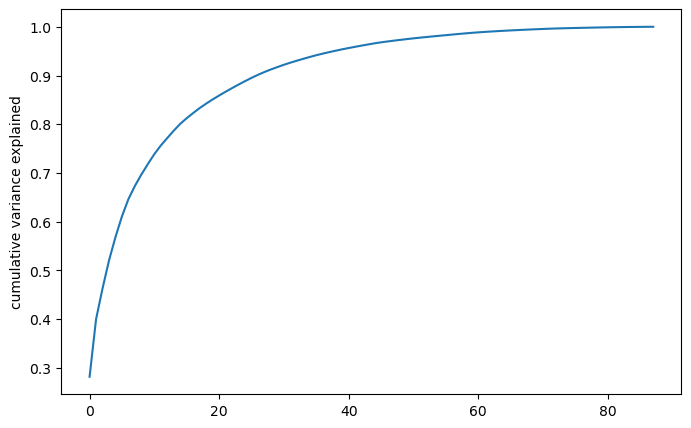

In [112]:
fig=plt.figure(figsize=[8,5])
plt.plot(var_cumu)
plt.ylabel("cumulative variance explained")
plt.show()

Observation:We can see that 50 components explain amost more than 95% variance of the data. So, we will perform PCA with 50 components.

**Performing PCA with 50 components**

In [113]:
pca_final=IncrementalPCA(n_components=50)

In [114]:
X_train_pca=pca_final.fit_transform(X_train)

In [115]:
corrmat=np.corrcoef(X_train_pca.transpose())

In [116]:
corrmat.shape

(50, 50)

<Axes: >

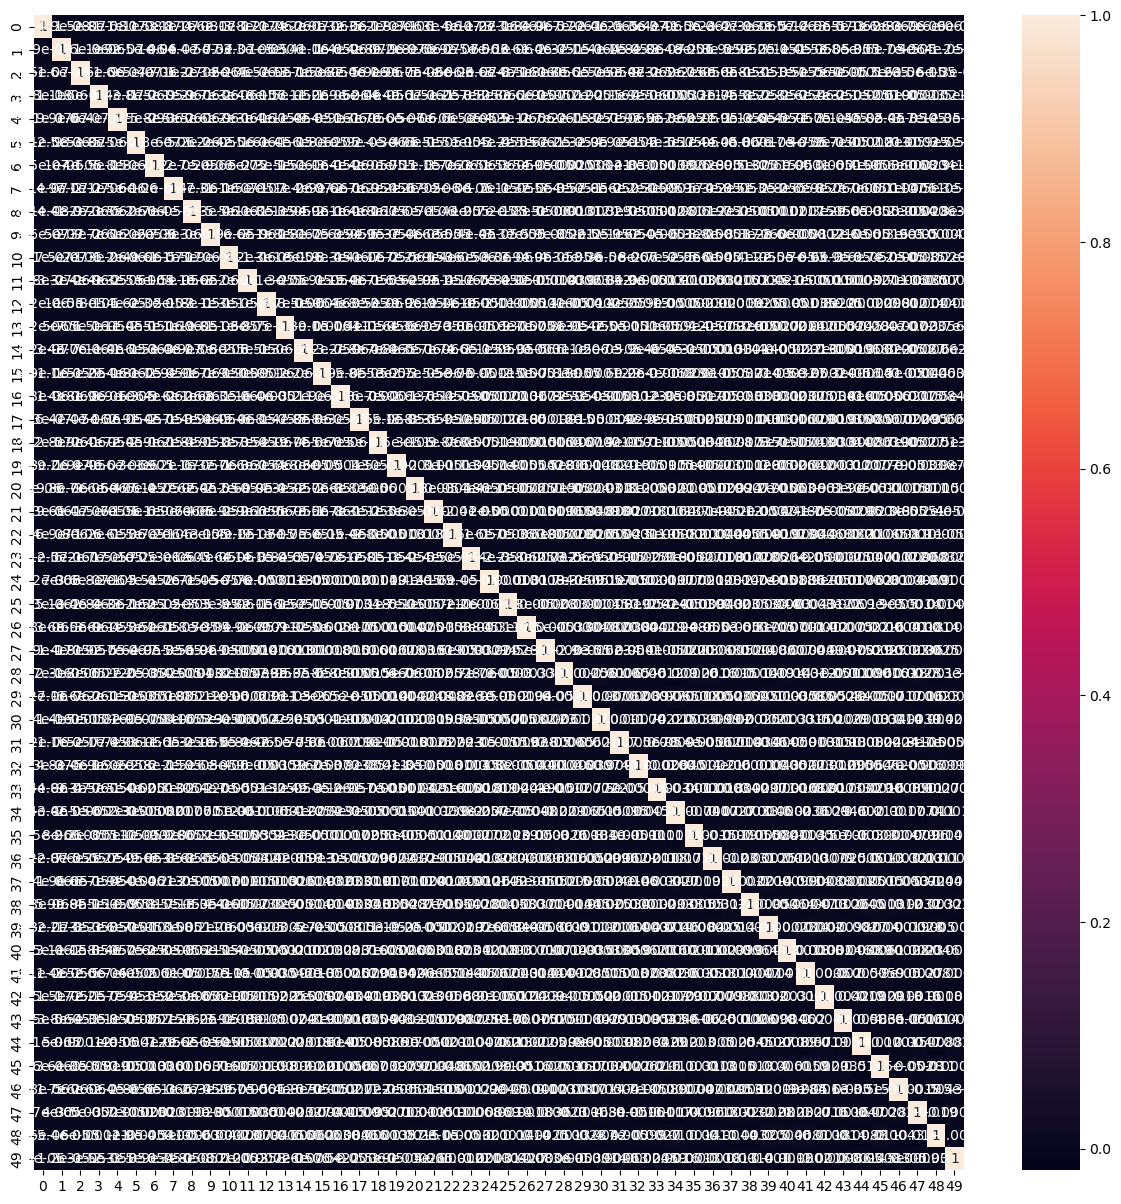

In [117]:
#plotting heat map
plt.figure(figsize=[15,15])
sns.heatmap(corrmat,annot=True)

In [118]:
#Applying on the test

We are only doing Transform in the test set not the Fit-Transform. Because the Fitting is already done on the train set. So, we just have to do the transformation with the already fitted data on the train set.

In [119]:
X_test_pca=pca_final.transform(X_test)

In [120]:
X_test_pca.shape

(8986, 50)

### <font color = "red">Data Modelling

In [121]:
#Function to plot accuracy metrics
def model_metrics(actual, predicted):
    confusion = confusion_matrix(actual, predicted)
    TP=confusion[1,1] #True positives
    TN= confusion[0,0] #True Negatives
    FP=confusion[0,1] #False Positives
    FN= confusion[1,0] #False Negatives
    acc_score = round(accuracy_score(actual, predicted),2) #accuracy score
    rcl_score=round(recall_score(actual, predicted),2) #recall score
    roc_score = round(roc_auc_score(actual, predicted),2) # roc_auc score
    fpr = round(FP/float(TN+FP),2) #False Positive Ratio
    specificity = round(TN/float(TN+FP),2) #False Positive Ratio
    metrics_df = pd.DataFrame(data=[[acc_score,roc_score,fpr,\
                                     specificity,rcl_score,TP,\
                                     TN,FP,FN,]],columns=['accuracy','roc_auc','fpr','specificity','recall_score',\
                                                          'true_positive','true_negative',\
                                                          'false_positive','false_negative'],index=['score'])
    return metrics_df

In [122]:
# Function to predict class labels based on model predicted probabilty and cutoff/threshold for assigning labels

def predictChurnlabeloncutoff(model,X,y,threshold=0.5):
    pred_probs = model.predict_proba(X)[:,1]
    pred_df= pd.DataFrame({'churn':y, 'churn_Prob':pred_probs})
    # Creating new column 'predicted' with 1 if Churn_Prob > threshold else 0
    pred_df['predicted'] = pred_df.churn_Prob.map( lambda x: 1 if x > threshold else 0)
    return pred_df

Observation:Here  we want to predict customers who are likely to churn(positive class). Hence, we want to maximize(Recall/Senstivity). Also, we don't want to drop accuracy or roc_auc value much while maximising recall.

### <font color = "green">1.  Logistic Regression (with default parameters)

In [123]:
# Training  a Logistic Regression classifier on the balanced training set with reduced dimensions

log_reg=LogisticRegression(random_state=42)
log_reg.fit(X_train_pca,y_train)

LogisticRegression(random_state=42)

In [124]:
y_test_pred=log_reg.predict(X_test_pca)

In [125]:
print(classification_report(y_test,y_test_pred))
model_metrics(y_test,y_test_pred)

              precision    recall  f1-score   support

           0       0.98      0.80      0.88      8305
           1       0.24      0.77      0.37       681

    accuracy                           0.80      8986
   macro avg       0.61      0.79      0.62      8986
weighted avg       0.92      0.80      0.84      8986



accuracy  roc_auc  fpr  specificity  recall_score  true_positive  \
score       0.8     0.79  0.2          0.8          0.77            527   

       true_negative  false_positive  false_negative  
score           6655            1650             154

### <font color = "green">2. Logistic Regression (After Hyperparameter Tuning)

In [126]:
randm_state=45

In [127]:
fold=StratifiedKFold(random_state=randm_state,shuffle=True,n_splits=5)

In [128]:
params={'penalty':['l1'],'C':list(np.power(10.0, np.arange(-2, 3))),'solver':('saga','liblinear'),\
                                          'class_weight':['balanced']}
#we are using scoring metrics Recall
log_regcv=GridSearchCV(LogisticRegression(random_state=randm_state,max_iter=1000),param_grid=params,cv=fold,scoring='recall',\
                       verbose=1,return_train_score=True)
log_regcv.fit(X_train_pca,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=45, shuffle=True),
             estimator=LogisticRegression(max_iter=1000, random_state=45),
             param_grid={'C': [0.01, 0.1, 1.0, 10.0, 100.0],
                         'class_weight': ['balanced'], 'penalty': ['l1'],
                         'solver': ('saga', 'liblinear')},
             return_train_score=True, scoring='recall', verbose=1)

In [129]:
print(log_regcv.best_params_)
print(log_regcv.best_score_)
print(log_regcv.best_estimator_)
# test set prediction using tuned model
log_regcv=log_regcv.best_estimator_

{'C': 100.0, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'saga'}
0.8560499609679939
LogisticRegression(C=100.0, class_weight='balanced', max_iter=1000,
                   penalty='l1', random_state=45, solver='saga')


In [130]:
from scipy.optimize import fsolve
from scipy.interpolate import interp1d


def optimal_cutoff_1(df):
    # Let's create columns with different probability cutoffs 
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        df[i] = df.churn_Prob.map(lambda x: 1 if x > i else 0)

    # Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
    cutoff_df = pd.DataFrame(columns=['prob', 'accuracy', 'recall', 'specificity'])

    num = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    for i in num:
        cm1 = confusion_matrix(df.churn, df[i])
        total1 = sum(sum(cm1))
        accuracy = (cm1[0, 0] + cm1[1, 1]) / total1
        speci = cm1[0, 0] / (cm1[0, 0] + cm1[0, 1])
        sensi = cm1[1, 1] / (cm1[1, 0] + cm1[1, 1])
        cutoff_df.loc[i] = [i, accuracy, sensi, speci]

    cutoff_df.plot.line(x='prob', y=['accuracy', 'recall', 'specificity'], figsize=(8, 6))
    
    # Finding the intersection points of the sensitivity and accuracy curves
    sensi_interp = interp1d(cutoff_df["prob"], cutoff_df["recall"], kind="linear")
    acc_interp = interp1d(cutoff_df["prob"], cutoff_df["accuracy"], kind="linear")
    intersection_1 = np.round(float(fsolve(lambda x: sensi_interp(x) - acc_interp(x), 0.5)), 3)

    # Finding the intersection points of the specificity and accuracy curves
    speci_interp = interp1d(cutoff_df["prob"], cutoff_df["specificity"], kind="linear")
    intersection_2 = np.round(float(fsolve(lambda x: speci_interp(x) - acc_interp(x), 0.5)), 3)

    # Calculated the average of the two intersection points
    intersection_x = (intersection_1 + intersection_2) / 2

    # Interpolate the accuracy, sensitivity, & specificity at intersection point
    accuracy_at_intersection = np.round(float(acc_interp(intersection_x)), 2)
    sensitivity_at_intersection = np.round(float(sensi_interp(intersection_x)), 2)
    specificity_at_intersection = np.round(float(speci_interp(intersection_x)), 2)

    # Plotting the three curves and add vertical & horizontal lines at intersection point
    plt.axvline(x=intersection_x, color="grey", linewidth=0.55, linestyle="--")
    plt.axhline(y=accuracy_at_intersection, color="grey", linewidth=0.55, linestyle="--")

    # Adding annotation to display x, y intersection point co-ordinates
    plt.annotate(
        f"({intersection_x}, {accuracy_at_intersection})", 
        xy=(intersection_x, accuracy_at_intersection), 
        xytext=(20, 0), 
        textcoords="offset points", 
        ha="center", fontsize=9,
    )

    plt.show()


In [131]:
log_regcv.fit(X_train_pca,y_train) #fitting best models
df_cutoff=predictChurnlabeloncutoff(log_regcv,X_test_pca,y_test)

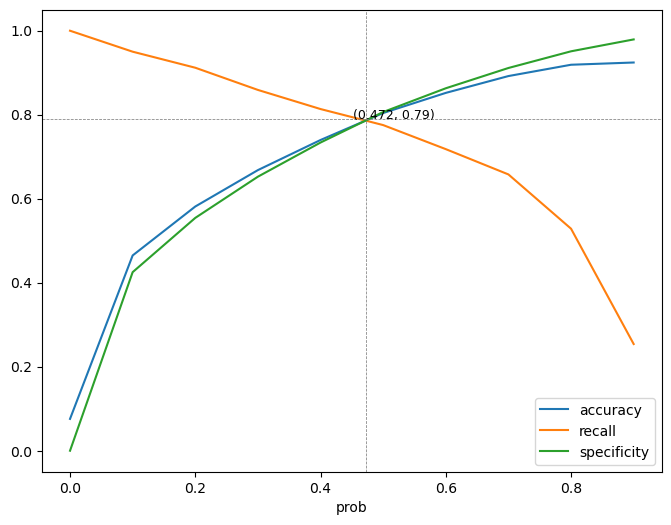

In [132]:
optimal_cutoff_1(df_cutoff)

Observation: From the above, the threshold seem to be 0.472

In [133]:
threshold=0.472
y_test_pred= predictChurnlabeloncutoff(log_regcv,X_test_pca,y_test,threshold).predicted
print('Classification Report:\n')
print(classification_report(y_test,y_test_pred))
print('Confusion Matrix:\n')
print(confusion_matrix(y_test,y_test_pred))
model_metrics(y_test,y_test_pred)

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.79      0.87      8305
           1       0.23      0.79      0.36       681

    accuracy                           0.79      8986
   macro avg       0.61      0.79      0.62      8986
weighted avg       0.92      0.79      0.83      8986

Confusion Matrix:

[[6550 1755]
 [ 146  535]]


accuracy  roc_auc   fpr  specificity  recall_score  true_positive  \
score      0.79     0.79  0.21         0.79          0.79            535   

       true_negative  false_positive  false_negative  
score           6550            1755             146

### <font color = "green">3. Random Forest (with default parameters)

In [134]:
rfc=RandomForestClassifier(random_state=randm_state)
rfc.fit(X_train_pca,y_train)
y_test_pred=rfc.predict(X_test_pca)
model_metrics(y_test,y_test_pred)

accuracy  roc_auc   fpr  specificity  recall_score  true_positive  \
score      0.91     0.73  0.06         0.94          0.51            348   

       true_negative  false_positive  false_negative  
score           7814             491             333

### <font color = "green">4. Random Forest (After Hyperparameter Tuning)

Observation:Tuning all hyperparametrs will take large amount of time beacuse of possible combination for gridsearchcv will be very large. Therefore, tuning 1 or 2 hyperparamters at a time.

**Tuning n_estimators and criterion**

In [135]:
fold=StratifiedKFold(random_state=randm_state,shuffle=True,n_splits=3)
params={'n_estimators': range(50,150,30)}
#we are using scoring metrics Recall
rfc_cv=GridSearchCV(RandomForestClassifier(random_state=randm_state,class_weight='balanced'),param_grid=params,cv=fold,scoring='recall',\
                       verbose=1,return_train_score=True)
rfc_cv.fit(X_train_pca,y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=45, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=45),
             param_grid={'n_estimators': range(50, 150, 30)},
             return_train_score=True, scoring='recall', verbose=1)

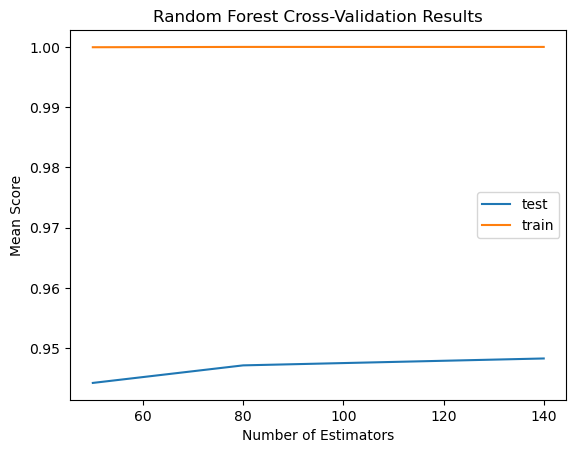

In [136]:
cv_results = pd.DataFrame(rfc_cv.cv_results_)

plt.plot(cv_results['param_n_estimators'], cv_results['mean_test_score'], label='test')
plt.plot(cv_results['param_n_estimators'], cv_results['mean_train_score'], label='train')
plt.legend()
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Score')
plt.title('Random Forest Cross-Validation Results')
plt.show()

Observation: Taking 80 as n_estimators

In [137]:
params={'criterion': ["gini", "entropy"]}
#we are using scoring metrics Recall
rfc_cv=GridSearchCV(RandomForestClassifier(random_state=randm_state,class_weight='balanced',n_estimators=80),param_grid=params,cv=fold,scoring='recall',\
                       verbose=1,return_train_score=True)
rfc_cv.fit(X_train_pca,y_train)


Fitting 3 folds for each of 2 candidates, totalling 6 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=45, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_estimators=80,
                                              random_state=45),
             param_grid={'criterion': ['gini', 'entropy']},
             return_train_score=True, scoring='recall', verbose=1)

In [138]:
rfc_cv.best_params_

{'criterion': 'entropy'}

**Tuning max_features**

In [139]:
fold=StratifiedKFold(random_state=randm_state,shuffle=True,n_splits=3)
params={'max_features': [5, 10, 15, 20, 25]}
#we are using scoring metrics Recall
rfc_cv=GridSearchCV(RandomForestClassifier(random_state=randm_state,class_weight='balanced',\
                                           n_estimators=80,criterion='entropy'),param_grid=params,cv=fold,scoring='recall',\
                       verbose=1,return_train_score=True)
rfc_cv.fit(X_train_pca,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=45, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              criterion='entropy',
                                              n_estimators=80,
                                              random_state=45),
             param_grid={'max_features': [5, 10, 15, 20, 25]},
             return_train_score=True, scoring='recall', verbose=1)

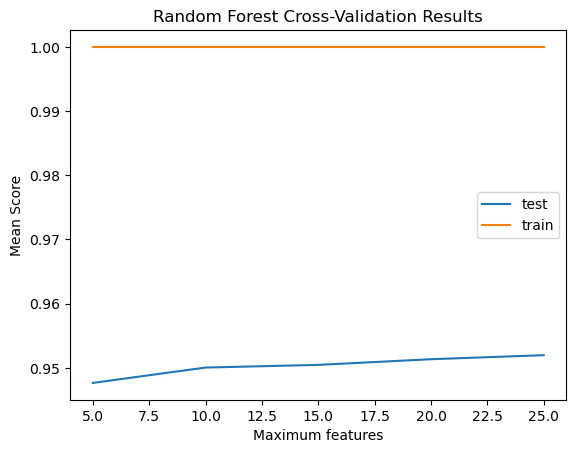

In [140]:
cv_results = pd.DataFrame(rfc_cv.cv_results_)

plt.plot(cv_results['param_max_features'], cv_results['mean_test_score'], label='test')
plt.plot(cv_results['param_max_features'], cv_results['mean_train_score'], label='train')
plt.legend()
plt.xlabel('Maximum features')
plt.ylabel('Mean Score')
plt.title('Random Forest Cross-Validation Results')
plt.show()

Observation: Number of features form th eplot above seem to be 10

**Tunning minimum sample leaf**

In [141]:
params={'min_samples_leaf': range(50, 200, 50)}
#we are using scoring metrics Recall
rfc_cv=GridSearchCV(RandomForestClassifier(random_state=randm_state,class_weight='balanced',\
                                           n_estimators=80,criterion='entropy',max_features=10),param_grid=params,cv=fold,scoring='recall',\
                       verbose=1,return_train_score=True)
rfc_cv.fit(X_train_pca,y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=45, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              criterion='entropy',
                                              max_features=10, n_estimators=80,
                                              random_state=45),
             param_grid={'min_samples_leaf': range(50, 200, 50)},
             return_train_score=True, scoring='recall', verbose=1)

In [142]:
print(rfc_cv.best_params_)
print(rfc_cv.best_score_)

{'min_samples_leaf': 50}
0.8583398386677076


**Tunning minimum sample split**

In [143]:
params={'min_samples_split': range(50, 200, 50)}
#we are using scoring metrics Recall
rfc_cv=GridSearchCV(RandomForestClassifier(random_state=randm_state,class_weight='balanced',\
                                           n_estimators=80,criterion='entropy',max_features=10,min_samples_leaf=50,\
                                          ),param_grid=params,cv=fold,scoring='recall',\
                       verbose=1,return_train_score=True)
rfc_cv.fit(X_train_pca,y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=45, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              criterion='entropy',
                                              max_features=10,
                                              min_samples_leaf=50,
                                              n_estimators=80,
                                              random_state=45),
             param_grid={'min_samples_split': range(50, 200, 50)},
             return_train_score=True, scoring='recall', verbose=1)

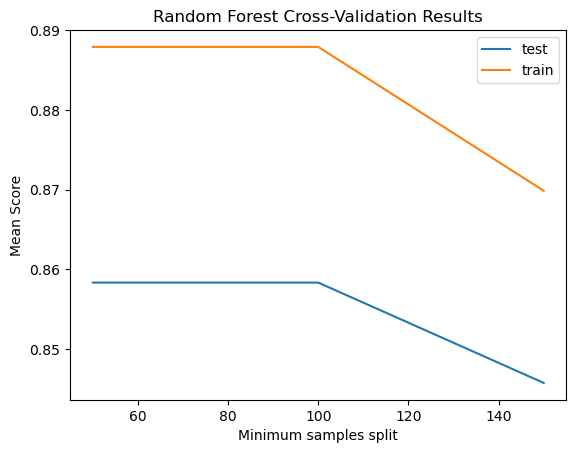

In [144]:
cv_results = pd.DataFrame(rfc_cv.cv_results_)
plt.plot(cv_results['param_min_samples_split'],cv_results['mean_test_score'],label='test')
plt.plot(cv_results['param_min_samples_split'],cv_results['mean_train_score'],label='train')
plt.legend()
plt.xlabel('Minimum samples split')
plt.ylabel('Mean Score')
plt.title('Random Forest Cross-Validation Results')
plt.show()

Observation:Minimum samples split came to be 100
    

**Tuned Random Forest**

In [145]:
rfc=RandomForestClassifier(random_state=randm_state,class_weight='balanced',\
                                           n_estimators=80,criterion='entropy',max_features=10,min_samples_leaf=50,\
                                          min_samples_split=100)
rfc.fit(X_train_pca,y_train)


RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_features=10, min_samples_leaf=50,
                       min_samples_split=100, n_estimators=80, random_state=45)

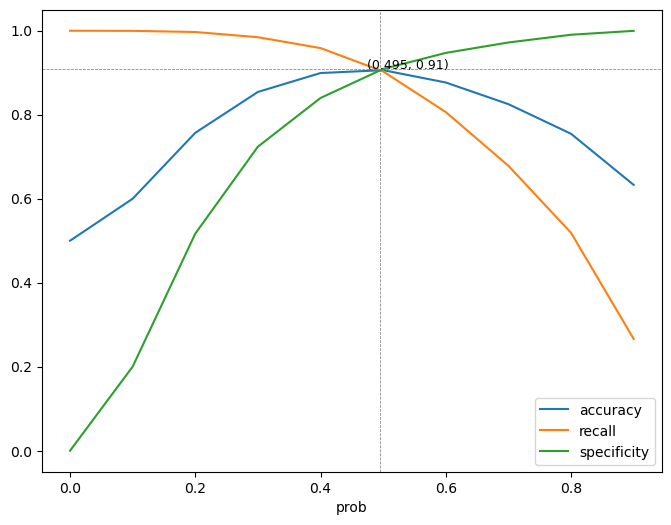

In [146]:
df_cutoff=predictChurnlabeloncutoff(rfc,X_train_pca,y_train)
optimal_cutoff_1(df_cutoff)

Observation:
- We want recall to be better so going with 0.37, as you can see above from the at 0.37 recall is slightly better than accuracy and specificty
- From graph, at 0.37 we can have good score for recall, accuracy and specificity.

In [147]:
threshold=0.37
y_test_pred= predictChurnlabeloncutoff(rfc,X_test_pca,y_test,threshold).predicted
print('Classification Report:\n')
print(classification_report(y_test,y_test_pred))
print('Confusion Matrix:\n')
print(confusion_matrix(y_test,y_test_pred))
model_metrics(y_test,y_test_pred)

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.77      0.86      8305
           1       0.23      0.80      0.35       681

    accuracy                           0.78      8986
   macro avg       0.60      0.79      0.61      8986
weighted avg       0.92      0.78      0.83      8986

Confusion Matrix:

[[6420 1885]
 [ 133  548]]


accuracy  roc_auc   fpr  specificity  recall_score  true_positive  \
score      0.78     0.79  0.23         0.77           0.8            548   

       true_negative  false_positive  false_negative  
score           6420            1885             133

### <font color = "green">5. Gradient Boosting

In [148]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train_pca,y_train)
y_train_pred = gbc.predict_proba(X_train_pca)

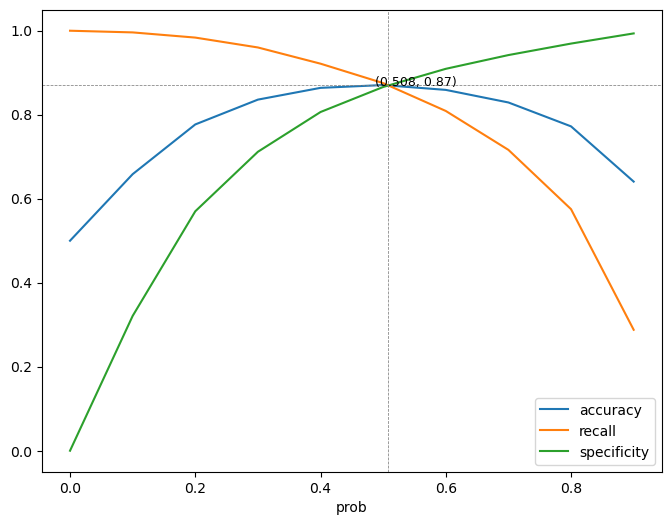

In [149]:
df_cutoff=predictChurnlabeloncutoff(gbc,X_train_pca,y_train)
optimal_cutoff_1(df_cutoff)

Observation:  Since we are focussing on Recall, from the graph, I'm taking 0.36 as we have good score for recall, accuracy and specificity 

In [150]:
threshold=0.36 
y_test_pred= predictChurnlabeloncutoff(gbc,X_test_pca,y_test,threshold).predicted
print('Classification Report:\n')
print(classification_report(y_test,y_test_pred))
print('Confusion Matrix:\n')
print(confusion_matrix(y_test,y_test_pred))
model_metrics(y_test,y_test_pred)

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.75      0.85      8305
           1       0.21      0.83      0.34       681

    accuracy                           0.75      8986
   macro avg       0.60      0.79      0.59      8986
weighted avg       0.92      0.75      0.81      8986

Confusion Matrix:

[[6214 2091]
 [ 113  568]]


accuracy  roc_auc   fpr  specificity  recall_score  true_positive  \
score      0.75     0.79  0.25         0.75          0.83            568   

       true_negative  false_positive  false_negative  
score           6214            2091             113

### <font color = "green">6. XGBoost Model (Tuned)

In [151]:
xgb=xgb.XGBClassifier(random_state=randm_state ,max_depth = 3 , learning_rate=0.01,\
                  n_estimators=100,objective='binary:logistic')
xgb.fit(X_train_pca,y_train)
y_train_pred = xgb.predict_proba(X_train_pca)

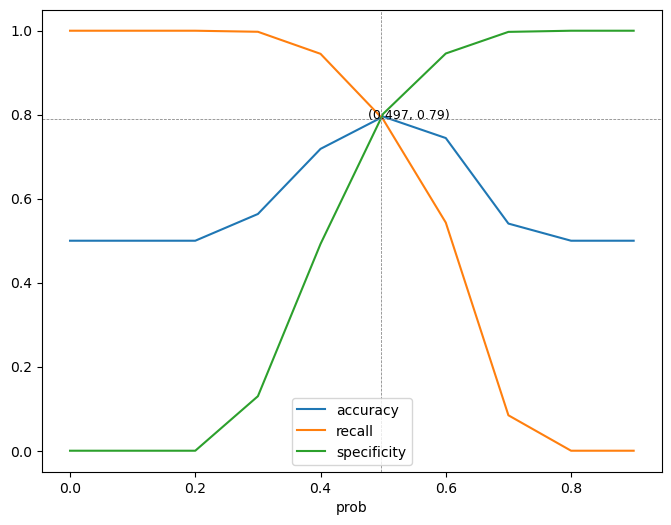

In [152]:
df_cutoff=predictChurnlabeloncutoff(xgb,X_train_pca,y_train) #optimal cutoff
optimal_cutoff_1(df_cutoff)

Observation: Since we are focussing on Recall, from the graph, I'm taking 0.43 as we have good score for recall, accuracy and specificity

In [153]:
threshold=0.43 
y_test_pred= predictChurnlabeloncutoff(xgb,X_test_pca,y_test,threshold).predicted
print('Classification Report:\n')
print(classification_report(y_test,y_test_pred))
print('Confusion Matrix:\n')
print(confusion_matrix(y_test,y_test_pred))
model_metrics(y_test,y_test_pred)

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.59      0.74      8305
           1       0.14      0.83      0.24       681

    accuracy                           0.61      8986
   macro avg       0.56      0.71      0.49      8986
weighted avg       0.91      0.61      0.70      8986

Confusion Matrix:

[[4913 3392]
 [ 113  568]]


accuracy  roc_auc   fpr  specificity  recall_score  true_positive  \
score      0.61     0.71  0.41         0.59          0.83            568   

       true_negative  false_positive  false_negative  
score           4913            3392             113

### <font color = "red">Conclusion 

**Based on different tuned modelled which had under gone PCA and SMOTE,following are the result.**

Here we want to predict customers who are likely to churn(positive class). Hence, we want to maximize(Recall/Senstivity). Also, we don't want to drop accuracy or roc_auc value much while maximising recall.

- **Logistic Regression** 
    - Recall : 79%
    - Accuracy : 79%

- **Random Forest**
    - Recall : 80%
    - Accuracy : 78%

- **Gradient Boosting** 
    - Recall : 83%
    - Accuracy : 75%

- **XGBoost**
    - Recall : 83%
    - Accuracy : 61%

**OBSERVATION:**
    **Here Gradient Boost Classifier  and XGBoost classifier  has maximum Recall of 83%.**

### <font color = "purple">Interpretable model for Business understanding

**Objective:**

Identifying the important predictor attributes which help the business understand indicators of churn. 

Here I'm going to do **Random Forest** for satisfying the objective

### Random Forest 

In [154]:
telecom_hvc.head()

onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  \
0          0.00         0.00         0.00          0.00          0.00   
7         57.84        54.68        52.29        453.43        567.16   
8        413.69       351.03        35.08         94.66         80.63   
21       102.41       132.11        85.14        757.93        896.68   
23        48.96        50.66        33.58         85.41         89.36   

    offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
0           0.00           0.00           0.00           0.00           0.00   
7         325.91          16.23          33.49          31.64          23.74   
8         136.48           0.00           0.00           0.00           0.00   
21        983.39           0.00           0.00           0.00           0.00   
23        205.89           0.00           0.00           0.00           0.00   

    roam_og_mou_7  roam_og_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0            0.00           0.00              0.00              0.00   
7           12.59          38.06             62.13             55.14   
8            0.00           0.00              0.00              0.00   
21           0.00           0.00              0.75              0.00   
23           0.00           0.00              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               0.00               0.0               0.0              0.00   
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
21              1.58               0.0               0.0              0.00   
23              0.00               0.0               0.0             17.71   

    std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  spl_og_mou_6  \
0               0.00              0.00              0.00           0.0   
7               6.66             20.08             16.68           4.5   
8               0.00              0.00              0.00           0.0   
21              0.00              0.00              0.00           0.0   
23              0.00              0.00              0.00           0.1   

    spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  \
0            0.0          0.00          0.0          0.0          0.0   
7            0.0          6.50          0.0          0.0          0.0   
8            0.0         10.23          0.0          0.0          0.0   
21           0.0          0.00          0.0          0.0          0.0   
23           0.0         17.71          0.0          0.0          0.0   

    loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  std_ic_t2t_mou_6  \
0               0.00              0.00              1.15              0.00   
7             152.16            101.46             39.53             36.89   
8               0.00              0.00              0.00              0.00   
21              4.61              2.84             10.39             14.06   
23              0.00              0.00              0.71              0.51   

    std_ic_t2t_mou_7  std_ic_t2t_mou_8  std_ic_t2m_mou_6  std_ic_t2m_mou_7  \
0               0.00              0.00              0.00              0.00   
7              11.83             30.39             91.44            126.99   
8               0.58              0.10             22.43              4.08   
21              5.98              0.18             67.69             38.23   
23              0.00             13.38              2.43             14.89   

    std_ic_t2m_mou_8  std_ic_t2f_mou_6  std_ic_t2f_mou_7  std_ic_t2f_mou_8  \
0               0.00              0.00              0.00              0.00   
7             141.33             52.19             34.24             22.21   
8               0.65              0.00              0.00              0.00   
21            101.74              0.00          

In [155]:
X=telecom_hvc.drop('Churn',axis=1)
y=telecom_hvc['Churn']

In [156]:
telecom_hvc.shape

(29953, 89)

In [157]:
df_train,df_test=train_test_split(telecom_hvc,train_size=0.7,random_state=42)

In [158]:
df_train.shape

(20967, 89)

In [159]:
df_test.shape

(8986, 89)

In [160]:
y_train = df_train['Churn']
X_train = df_train.drop('Churn',axis=1)
y_test = df_test['Churn']
X_test = df_test.drop('Churn',axis=1)

# Scaling
scaler = StandardScaler()
colums = list(X_train.columns)
X_train[colums] = scaler.fit_transform(X_train[colums])
X_test[colums] = scaler.transform(X_test[colums])

In [161]:
rfc=RandomForestClassifier(random_state=randm_state,class_weight='balanced',\
                                           n_estimators=80,criterion='entropy',max_features=10,min_samples_leaf=50,\
                                          min_samples_split=100)
rfc.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_features=10, min_samples_leaf=50,
                       min_samples_split=100, n_estimators=80, random_state=45)

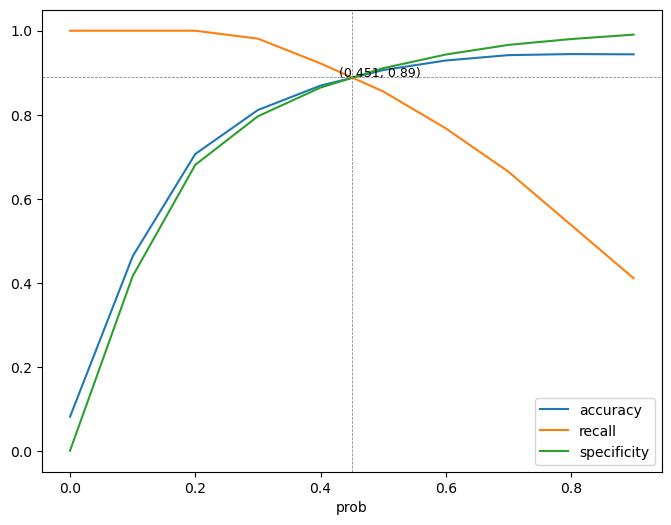

In [162]:
df_cutoff=predictChurnlabeloncutoff(rfc,X_train,y_train)
optimal_cutoff_1(df_cutoff)


In [163]:
threshold=0.4 #from graph, at 0.4 we can have good score for recall(objective to maximize recall) with decent score for accuracy and specificity.
y_test_pred= predictChurnlabeloncutoff(rfc,X_test,y_test,threshold).predicted
print('Classification Report:\n')
print(classification_report(y_test,y_test_pred))
print('Confusion Matrix:\n')
print(confusion_matrix(y_test,y_test_pred))
model_metrics(y_test,y_test_pred)


Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.86      0.92      8248
           1       0.36      0.86      0.51       738

    accuracy                           0.86      8986
   macro avg       0.67      0.86      0.71      8986
weighted avg       0.93      0.86      0.89      8986

Confusion Matrix:

[[7113 1135]
 [ 103  635]]


accuracy  roc_auc   fpr  specificity  recall_score  true_positive  \
score      0.86     0.86  0.14         0.86          0.86            635   

       true_negative  false_positive  false_negative  
score           7113            1135             103

In [166]:
# Check the feature importance score for each feature
feature_imp_df = pd.DataFrame({'Feature':X_train.columns, 'Score':rfc.feature_importances_})
feature_imp_df = feature_imp_df.sort_values('Score', ascending=False).reset_index() # Order features by score
feature_imp_df.head(20)

index             Feature     Score
0      87  overall_rech_amt_8  0.105424
1      59  last_day_rch_amt_8  0.090041
2      53    total_rech_amt_8  0.074695
3      11       roam_og_mou_8  0.063913
4      56      max_rech_amt_8  0.056428
5      29    loc_ic_t2f_mou_8  0.052317
6       5        offnet_mou_8  0.040158
7       8       roam_ic_mou_8  0.038356
8      35    std_ic_t2m_mou_8  0.034202
9       2         onnet_mou_8  0.033702
10     14    loc_og_t2f_mou_8  0.029969
11     65         vol_2g_mb_8  0.027777
12     62     max_rech_data_8  0.023178
13     50    total_rech_num_8  0.017722
14     68         vol_3g_mb_8  0.016588
15     32    std_ic_t2t_mou_8  0.012495
16     23        spl_og_mou_8  0.011255
17     52    total_rech_amt_7  0.011033
18      4        offnet_mou_7  0.010527
19      0         onnet_mou_6  0.010333

In [167]:
m=list(feature_imp_df.Feature[:16])
n=list(feature_imp_df.Score[:16])

print(m)
print(n)

['overall_rech_amt_8', 'last_day_rch_amt_8', 'total_rech_amt_8', 'roam_og_mou_8', 'max_rech_amt_8', 'loc_ic_t2f_mou_8', 'offnet_mou_8', 'roam_ic_mou_8', 'std_ic_t2m_mou_8', 'onnet_mou_8', 'loc_og_t2f_mou_8', 'vol_2g_mb_8', 'max_rech_data_8', 'total_rech_num_8', 'vol_3g_mb_8', 'std_ic_t2t_mou_8']
[0.10542404629976354, 0.0900405116380693, 0.07469485391781892, 0.06391325642005215, 0.05642807098367565, 0.05231722503629769, 0.04015806212448039, 0.03835611789093503, 0.034202003657692284, 0.0337016592752215, 0.029968637253054237, 0.02777670044636609, 0.023177567464802196, 0.01772248620759747, 0.01658818897015078, 0.01249528466540876]


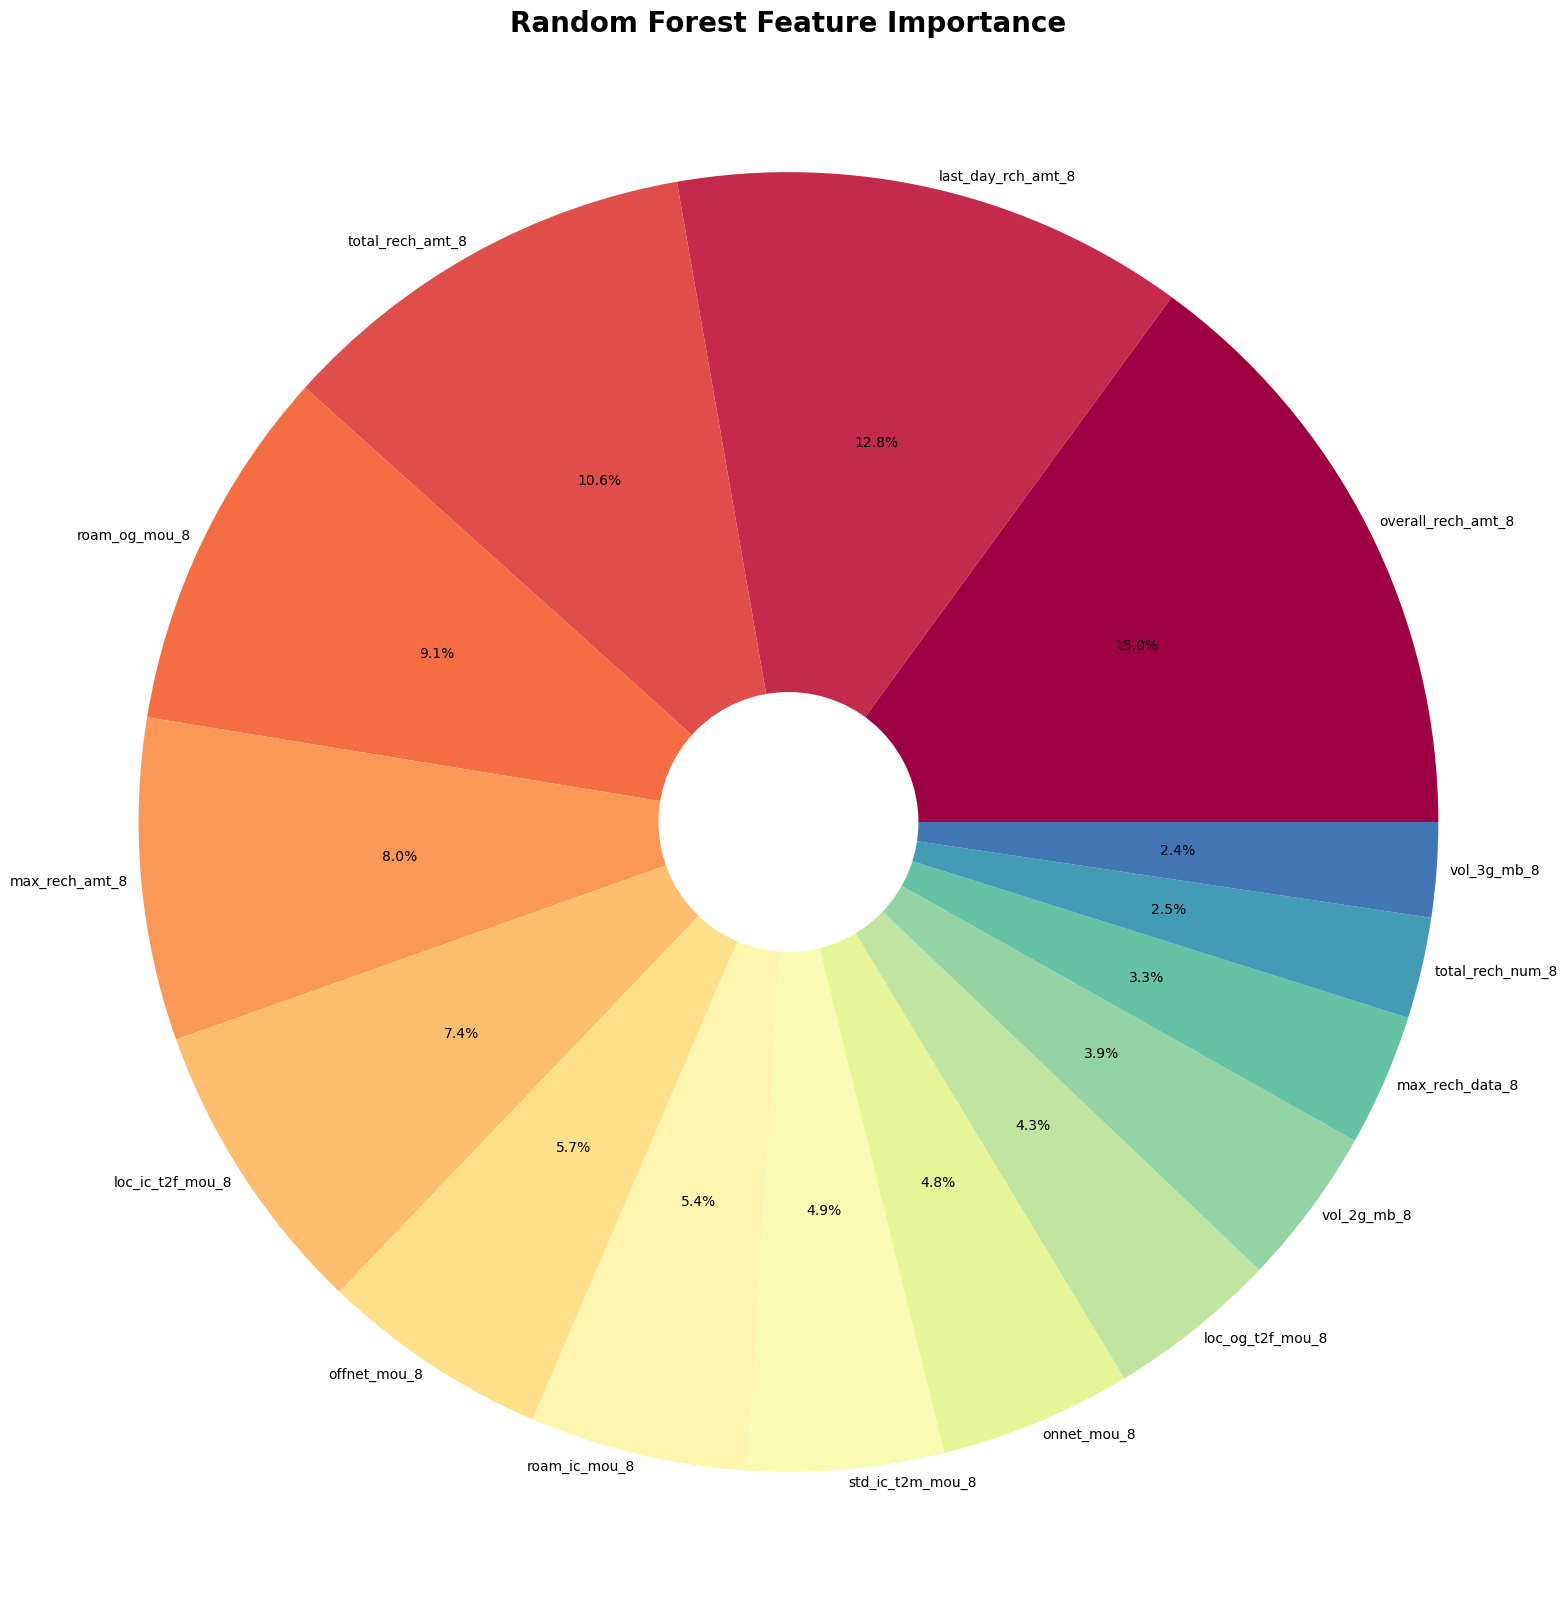

In [168]:
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 16)]
plt.figure(figsize=(16,16))
wedges1, labels1, autopct1 = plt.pie(list(feature_imp_df.Score[:15]), labeldistance=1.02,\
                                  labels=list(feature_imp_df.Feature[:15]), autopct='%1.1f%%', shadow=False, colors=colors)
plt.rcParams['font.size'] = 12
plt.rcParams['font.weight'] = 'bold'
centre_circle = plt.Circle((0,0),0.20,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')  
plt.tight_layout()
plt.title('Random Forest Feature Importance',fontweight='bold',size=20)
plt.show()

### <font color = "purple">Top 5 features to consider by the telecom company

**Top 5 feature variables for business which will be very helpful in business making decision and give additional benefits/discount to customers who are likely to churn**

1. overall_rech_amt_8 (Overall recharge ampount of month 8 which include both calling and data)
2. last_day_rch_amt_8 (last dat recharge amount for 8th month)
3. total_rech_amt_8(total recharge amount month 8)
4. roam_og_mou_8 (roaming outgoing usage for 8th month)
5. max_rech_amt_8 (maximum recharge amount of month 8)

This random forest model gives 

- **Recall Score= 86%**
- **Accuracy = 86%**
- **ROC AUC= 86%**
- **Specificity= 86%**

### <font color = "purple">Recommendation

1. **Promotional Offers: Offer targeted promotional offers and discounts to customers based on their recharge patterns. For example, provide special discounts or bonus data packs to customers who frequently recharge with high amounts (e.g., "Top-Up Mondays" with extra benefits for recharges above a certain amount).**

2. **Customized Recharge Plans: Analyze the usage patterns of customers and create customized recharge plans that align with their usage behavior. Offer plans that cater to both voice and data needs, ensuring that customers get value for their money.**

3. **Roaming Packages: For customers who frequently use roaming services, offer cost-effective roaming packages. Provide options that reduce the cost of outgoing and incoming calls while roaming, making it more attractive for them to stay with your network.**